In [11]:
source('lexdiv_helper.R')

In [81]:
#connect R to mysql
childes_db = dbConnect(MySQL(), user=config[['username']], password=config[['password']], dbname=config[['dbasename']], host=config[['host']])

In [ ]:
#dbListTables(childes_db)

In [3]:
all = dbGetQuery(childes_db, "select * from words where speaker = 'CHI' AND age != 'NA' ")

In [ ]:
names(all)

In [ ]:
# #assigning child names
# all$child = 0
# getchi = split(all, all$participants)

# for (elem in 1:length(getchi)){
#   chi_name = unlist(strsplit(names(getchi)[elem], " "))[2]
#   all$child[all$participants == names(getchi)[elem]] = chi_name
# }

# #cleaning up child names before adding tokens
# all$child[all$child == "Target"] = "Eric"
# all$child[all$child == "Target_Child"] = "Gia"
# all$child[all$child == "Mother"] = "Nina"

# #removing Gia because CHI only says 902 tokens, which is less than the 1024 tokens needed for a single lexical diversity metric
# all = all[all$child != "Gia",]

# SEE BELOW

In [4]:
childmap = list(Target="Eric", Target_Child='Gia', Mother="Nina")
all$child = sapply(strsplit(all$participants, ' '), function(x){
    ifelse(x[2] %in% names(childmap), childmap[[x[2]]], x[2])       
})
all = subset(all, child != "Gia")

In [5]:
#assinging index for breaking up into 1024 tokens each
all$chi_index = 0

for (elem in unique(all$child)){
    all$chi_index[all$child == elem] = 1:length(all$chi_index[all$child == elem])
}

In [6]:
#gets various age metrics for the graph
splitchi = split(all, all$child)
#checks dimensions of each child
dimchi = lapply(splitchi, dim)

In [7]:
max_age = lapply(splitchi, function (x) max(x$age, na.rm = TRUE))
median_age = lapply(splitchi, function (x) median(x$age, na.rm = TRUE))
min_age = lapply(splitchi, function (x) min(x$age, na.rm = TRUE))
mean_age = lapply(splitchi, function (x) mean(x$age, na.rm = TRUE))
allchigraph = data.frame("child" = names(mean_age), 
           "max_age" = unlist(max_age), 
           "min_age" = unlist(min_age), 
           "median_age" = unlist(median_age), 
           "mean_age" = unlist(mean_age))

In [8]:
childnames = unique(allchigraph$child)

In [ ]:
#childnames = unique(all$child)


# Compute lexical diversity of Uber Index, Yule's I, and MTLD by child

In [ ]:
#following cell crashes when run in parallel, with no error message. Otherwise it's very slow.

In [56]:
#allchiLD = mclapply(as.character(childnames), process_one_child, mc.cores=detectCores())
source('lexdiv_helper.R')
allchiLD = lapply(as.character(childnames), process_one_child)


   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  259

HD-D
          HD-D: 33.33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  262

HD-D
          HD-D: 33.78
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  246

HD-D
          HD-D: 33.07
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1125
Total number of types:  268

HD-D
          HD-D: 33.58
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  270

HD-D
          HD-D: 33.97
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  280

HD-D
          HD-D: 34.28
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  239

HD-D
          HD-D: 33.46
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  229

HD-D
          HD-D: 33.19
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  226

HD-D
          HD-D: 32.66
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  219

HD-D
          HD-D: 32.25
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  197

HD-D
          HD-D: 31.93
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 176 feature types
   ... created a 1 x 176 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  172

HD-D
          HD-D: 30.72
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  181

HD-D
          HD-D: 31.47
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  194

HD-D
          HD-D: 31.93
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  201

HD-D
          HD-D: 31.09
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  226

HD-D
          HD-D: 31.4
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  221

HD-D
          HD-D: 32.4
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  225

HD-D
          HD-D: 32.45
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1138
Total number of types:  239

HD-D
          HD-D: 32.19
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1152
Total number of types:  216

HD-D
          HD-D: 31.21
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1117
Total number of types:  222

HD-D
          HD-D: 31.28
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  232

HD-D
          HD-D: 31.41
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  246

HD-D
          HD-D: 33.01
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  250

HD-D
          HD-D: 33.22
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  219

HD-D
          HD-D: 31.52
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  218

HD-D
          HD-D: 31.59
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  210

HD-D
          HD-D: 31.48
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  200

HD-D
          HD-D: 30.81
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  202

HD-D
          HD-D: 30.96
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  218

HD-D
          HD-D: 31.36
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  220

HD-D
          HD-D: 31.99
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  228

HD-D
          HD-D: 32.42
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  240

HD-D
          HD-D: 32.2
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  242

HD-D
          HD-D: 31.92
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  228

HD-D
          HD-D: 32.3
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  217

HD-D
          HD-D: 31.72
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  234

HD-D
          HD-D: 32.51
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  235

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  227

HD-D
          HD-D: 32.72
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  239

HD-D
          HD-D: 33.46
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  234

HD-D
          HD-D: 33.71
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  218

HD-D
          HD-D: 32.19
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  202

HD-D
          HD-D: 31.97
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 190 feature types
   ... created a 1 x 190 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  186

HD-D
          HD-D: 31.38
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  210

HD-D
          HD-D: 31.35
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  221

HD-D
          HD-D: 32.15
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  224

HD-D
          HD-D: 32.36
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  238

HD-D
          HD-D: 32.92
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  265

HD-D
          HD-D: 33.54
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1126
Total number of types:  262

HD-D
          HD-D: 33.41
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1152
Total number of types:  241

HD-D
          HD-D: 32.61
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  250

HD-D
          HD-D: 32.63
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  252

HD-D
          HD-D: 32.81
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  237

HD-D
          HD-D: 32.47
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  248

HD-D
          HD-D: 32.64
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  241

HD-D
          HD-D: 33.54
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  255

HD-D
          HD-D: 33.51
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  246

HD-D
          HD-D: 32.35
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  246

HD-D
          HD-D: 32.56
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  256

HD-D
          HD-D: 32.67
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  234

HD-D
          HD-D: 32.89
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  233

HD-D
          HD-D: 33.28
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  243

HD-D
          HD-D: 32.59
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1130
Total number of types:  235

HD-D
          HD-D: 32.76
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1124
Total number of types:  256

HD-D
          HD-D: 33.57
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  262

HD-D
          HD-D: 33.21
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  226

HD-D
          HD-D: 31.26
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  228

HD-D
          HD-D: 31.92
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  257

HD-D
          HD-D: 33.58
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  255

HD-D
          HD-D: 33.24
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  245

HD-D
          HD-D: 33.89
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  260

HD-D
          HD-D: 33.94
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  265

HD-D
          HD-D: 33.97
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  257

HD-D
          HD-D: 33.46
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  221

HD-D
          HD-D: 32.5
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  237

HD-D
          HD-D: 33.88
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  237

HD-D
          HD-D: 33.46
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  244

HD-D
          HD-D: 33.83
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  254

HD-D
          HD-D: 33.76
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  254

HD-D
          HD-D: 34.1
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  263

HD-D
          HD-D: 33.63
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  270

HD-D
          HD-D: 33.49
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1139
Total number of types:  244

HD-D
          HD-D: 32.62
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1160
Total number of types:  264

HD-D
          HD-D: 32.85
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  274

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  279

HD-D
          HD-D: 33.77
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 287 feature types
   ... created a 1 x 287 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  280

HD-D
          HD-D: 34.12
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  275

HD-D
          HD-D: 34.47
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  262

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  274

HD-D
          HD-D: 34.16
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  280

HD-D
          HD-D: 34.52
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  258

HD-D
          HD-D: 33.85
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  247

HD-D
          HD-D: 32.83
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  282

HD-D
          HD-D: 33.96
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  282

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  248

HD-D
          HD-D: 34.06
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  245

HD-D
          HD-D: 33.95
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  252

HD-D
          HD-D: 33.96
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  263

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  269

HD-D
          HD-D: 34.75
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  254

HD-D
          HD-D: 34.06
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  240

HD-D
          HD-D: 33.96
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  220

HD-D
          HD-D: 32.5
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  247

HD-D
          HD-D: 33.35
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 293 feature types
   ... created a 1 x 293 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  288

HD-D
          HD-D: 35.21
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 293 feature types
   ... created a 1 x 293 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  284

HD-D
          HD-D: 35.06
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  258

HD-D
          HD-D: 34.16
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  250

HD-D
          HD-D: 33.3
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  237

HD-D
          HD-D: 33.14
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  245

HD-D
          HD-D: 33.77
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  256

HD-D
          HD-D: 33.65
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  253

HD-D
          HD-D: 33.93
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  237

HD-D
          HD-D: 33.31
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  236

HD-D
          HD-D: 33.34
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  269

HD-D
          HD-D: 34.16
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  280

HD-D
          HD-D: 34.51
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  264

HD-D
          HD-D: 33.93
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  266

HD-D
          HD-D: 33.35
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  263

HD-D
          HD-D: 33.61
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  250

HD-D
          HD-D: 34.08
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  272

HD-D
          HD-D: 34.23
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  279

HD-D
          HD-D: 34.56
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  260

HD-D
          HD-D: 34.59
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  266

HD-D
          HD-D: 34.61
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.027 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  270

HD-D
          HD-D: 34.29
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  263

HD-D
          HD-D: 33.87
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  272

HD-D
          HD-D: 34.15
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1117
Total number of types:  275

HD-D
          HD-D: 34.71
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 307 feature types
   ... created a 1 x 307 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  300

HD-D
          HD-D: 34.87
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 319 feature types
   ... created a 1 x 319 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  307

HD-D
          HD-D: 34.97
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  271

HD-D
          HD-D: 34.59
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  281

HD-D
          HD-D: 34.56
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 301 feature types
   ... created a 1 x 301 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  292

HD-D
          HD-D: 34.84
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  300

HD-D
          HD-D: 34.76
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 299 feature types
   ... created a 1 x 299 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  293

HD-D
          HD-D: 33.9
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  275

HD-D
          HD-D: 33.1
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  267

HD-D
          HD-D: 33.88
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  261

HD-D
          HD-D: 34.04
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  266

HD-D
          HD-D: 34.17
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  272

HD-D
          HD-D: 34.75
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  262

HD-D
          HD-D: 33.99
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  298

HD-D
          HD-D: 34.58
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  277

HD-D
          HD-D: 34.66
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  248

HD-D
          HD-D: 33.87
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  278

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  267

HD-D
          HD-D: 34.08
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  262

HD-D
          HD-D: 34.15
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  269

HD-D
          HD-D: 34.46
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 293 feature types
   ... created a 1 x 293 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  288

HD-D
          HD-D: 34.52
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 302 feature types
   ... created a 1 x 302 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  298

HD-D
          HD-D: 34.94
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  281

HD-D
          HD-D: 34.71
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  277

HD-D
          HD-D: 33.74
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  305

HD-D
          HD-D: 34.02
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  280

HD-D
          HD-D: 34.09
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  256

HD-D
          HD-D: 33.97
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  274

HD-D
          HD-D: 34.44
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  279

HD-D
          HD-D: 34.2
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  249

HD-D
          HD-D: 33.03
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  238

HD-D
          HD-D: 33.5
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  273

HD-D
          HD-D: 34.75
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  255

HD-D
          HD-D: 34.31
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  273

HD-D
          HD-D: 34.58
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  296

HD-D
          HD-D: 35.06
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  266

HD-D
          HD-D: 34.86
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  228

HD-D
          HD-D: 33.34
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  255

HD-D
          HD-D: 33.88
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 298 feature types
   ... created a 1 x 298 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  291

HD-D
          HD-D: 35.05
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  280

HD-D
          HD-D: 34.12
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1127
Total number of types:  270

HD-D
          HD-D: 33.94
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  274

HD-D
          HD-D: 34.11
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  261

HD-D
          HD-D: 34.32
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  250

HD-D
          HD-D: 34.74
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  267

HD-D
          HD-D: 34.41
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  252

HD-D
          HD-D: 34.35
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  273

HD-D
          HD-D: 34.57
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  281

HD-D
          HD-D: 34.77
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  261

HD-D
          HD-D: 34.77
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  240

HD-D
          HD-D: 34.12
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  272

HD-D
          HD-D: 34.63
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  285

HD-D
          HD-D: 34.96
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  279

HD-D
          HD-D: 34.51
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  285

HD-D
          HD-D: 35
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  269

HD-D
          HD-D: 34.9
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  268

HD-D
          HD-D: 35.22
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  274

HD-D
          HD-D: 35
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  272

HD-D
          HD-D: 34.08
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  276

HD-D
          HD-D: 35.12
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  270

HD-D
          HD-D: 34.48
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  283

HD-D
          HD-D: 34.11
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 325 feature types
   ... created a 1 x 325 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  319

HD-D
          HD-D: 34.57
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 313 feature types
   ... created a 1 x 313 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1116
Total number of types:  304

HD-D
          HD-D: 34.29
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  290

HD-D
          HD-D: 33.99
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  285

HD-D
          HD-D: 34.05
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  277

HD-D
          HD-D: 34.38
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  267

HD-D
          HD-D: 34.02
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  284

HD-D
          HD-D: 34.31
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  276

HD-D
          HD-D: 34.97
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  291

HD-D
          HD-D: 35.31
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 300 feature types
   ... created a 1 x 300 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  297

HD-D
          HD-D: 35.01
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  278

HD-D
          HD-D: 34.69
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  269

HD-D
          HD-D: 34.78
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  268

HD-D
          HD-D: 34.63
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  267

HD-D
          HD-D: 34.32
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  276

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 298 feature types
   ... created a 1 x 298 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  292

HD-D
          HD-D: 34.57
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 299 feature types
   ... created a 1 x 299 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  289

HD-D
          HD-D: 34.86
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  275

HD-D
          HD-D: 34.67
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  278

HD-D
          HD-D: 35.07
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  285

HD-D
          HD-D: 34.92
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  284

HD-D
          HD-D: 34.58
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  274

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  264

HD-D
          HD-D: 34.4
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  252

HD-D
          HD-D: 34.52
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  255

HD-D
          HD-D: 33.4
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 292 feature types
   ... created a 1 x 292 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  287

HD-D
          HD-D: 33.8
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  269

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  272

HD-D
          HD-D: 34.38
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 298 feature types
   ... created a 1 x 298 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  287

HD-D
          HD-D: 34.38
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  287

HD-D
          HD-D: 34.33
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 304 feature types
   ... created a 1 x 304 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  297

HD-D
          HD-D: 34.45
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  272

HD-D
          HD-D: 34.69
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  263

HD-D
          HD-D: 34.44
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  270

HD-D
          HD-D: 34.56
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  265

HD-D
          HD-D: 34.27
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  245

HD-D
          HD-D: 33.82
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  274

HD-D
          HD-D: 34.53
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  280

HD-D
          HD-D: 34.46
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  274

HD-D
          HD-D: 34.68
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 293 feature types
   ... created a 1 x 293 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  281

HD-D
          HD-D: 35.06
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 319 feature types
   ... created a 1 x 319 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  309

HD-D
          HD-D: 35.34
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 305 feature types
   ... created a 1 x 305 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  298

HD-D
          HD-D: 35.28
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  269

HD-D
          HD-D: 34.48
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  281

HD-D
          HD-D: 34.76
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  278

HD-D
          HD-D: 35.21
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  284

HD-D
          HD-D: 35.05
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 297 feature types
   ... created a 1 x 297 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  288

HD-D
          HD-D: 35.59
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 312 feature types
   ... created a 1 x 312 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  304

HD-D
          HD-D: 35.55
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.025 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  255

HD-D
          HD-D: 33.44
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  251

HD-D
          HD-D: 33.34
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  278

HD-D
          HD-D: 34.42
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  258

HD-D
          HD-D: 33.83
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  242

HD-D
          HD-D: 33.47
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  267

HD-D
          HD-D: 34.69
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  289

HD-D
          HD-D: 35.34
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  274

HD-D
          HD-D: 34.28
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  283

HD-D
          HD-D: 34.56
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  305

HD-D
          HD-D: 34.76
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 310 feature types
   ... created a 1 x 310 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  300

HD-D
          HD-D: 34.4
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 311 feature types
   ... created a 1 x 311 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  299

HD-D
          HD-D: 34.58
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 301 feature types
   ... created a 1 x 301 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  290

HD-D
          HD-D: 34.46
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  278

HD-D
          HD-D: 34.2
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  276

HD-D
          HD-D: 34.62
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 311 feature types
   ... created a 1 x 311 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  300

HD-D
          HD-D: 35.03
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 318 feature types
   ... created a 1 x 318 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  308

HD-D
          HD-D: 34.55
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 304 feature types
   ... created a 1 x 304 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  296

HD-D
          HD-D: 34.33
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 307 feature types
   ... created a 1 x 307 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  294

HD-D
          HD-D: 34.86
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  298

HD-D
          HD-D: 34.45
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  277

HD-D
          HD-D: 33.63
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  254

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 302 feature types
   ... created a 1 x 302 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  297

HD-D
          HD-D: 34.78
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 329 feature types
   ... created a 1 x 329 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  323

HD-D
          HD-D: 34.93
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 306 feature types
   ... created a 1 x 306 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  303

HD-D
          HD-D: 34.42
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 317 feature types
   ... created a 1 x 317 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  315

HD-D
          HD-D: 34.78
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 302 feature types
   ... created a 1 x 302 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  298

HD-D
          HD-D: 35.26
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 304 feature types
   ... created a 1 x 304 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  298

HD-D
          HD-D: 35.22
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 321 feature types
   ... created a 1 x 321 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  314

HD-D
          HD-D: 35.46
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  294

HD-D
          HD-D: 34.01
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 298 feature types
   ... created a 1 x 298 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  285

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1116
Total number of types:  299

HD-D
          HD-D: 35.27
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 329 feature types
   ... created a 1 x 329 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1116
Total number of types:  317

HD-D
          HD-D: 35.48
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 318 feature types
   ... created a 1 x 318 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  312

HD-D
          HD-D: 35.25
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 301 feature types
   ... created a 1 x 301 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  299

HD-D
          HD-D: 35.02
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 311 feature types
   ... created a 1 x 311 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1126
Total number of types:  305

HD-D
          HD-D: 35.48
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  304

HD-D
          HD-D: 35.62
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  263

HD-D
          HD-D: 34.28
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  273

HD-D
          HD-D: 34.32
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 302 feature types
   ... created a 1 x 302 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  296

HD-D
          HD-D: 34.6
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 320 feature types
   ... created a 1 x 320 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  318

HD-D
          HD-D: 34.88
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 318 feature types
   ... created a 1 x 318 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  313

HD-D
          HD-D: 34.7
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 312 feature types
   ... created a 1 x 312 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  302

HD-D
          HD-D: 34.51
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  301

HD-D
          HD-D: 34.42
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 299 feature types
   ... created a 1 x 299 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  292

HD-D
          HD-D: 34.19
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  277

HD-D
          HD-D: 34.61
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  275

HD-D
          HD-D: 34.4
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  297

HD-D
          HD-D: 34.12
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 316 feature types
   ... created a 1 x 316 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  306

HD-D
          HD-D: 34.82
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  303

HD-D
          HD-D: 35.15
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  295

HD-D
          HD-D: 34.81
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 300 feature types
   ... created a 1 x 300 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  296

HD-D
          HD-D: 34.6
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 301 feature types
   ... created a 1 x 301 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  297

HD-D
          HD-D: 34.1
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 329 feature types
   ... created a 1 x 329 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  326

HD-D
          HD-D: 34.85
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 337 feature types
   ... created a 1 x 337 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  332

HD-D
          HD-D: 35.3
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 324 feature types
   ... created a 1 x 324 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  319

HD-D
          HD-D: 35.66
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 317 feature types
   ... created a 1 x 317 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  309

HD-D
          HD-D: 35.82
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 335 feature types
   ... created a 1 x 335 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  325

HD-D
          HD-D: 35.18
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 335 feature types
   ... created a 1 x 335 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  329

HD-D
          HD-D: 35.67
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 331 feature types
   ... created a 1 x 331 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  325

HD-D
          HD-D: 35.39
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 312 feature types
   ... created a 1 x 312 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  304

HD-D
          HD-D: 34.51
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 313 feature types
   ... created a 1 x 313 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  304

HD-D
          HD-D: 34.98
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 319 feature types
   ... created a 1 x 319 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  310

HD-D
          HD-D: 35.42
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 314 feature types
   ... created a 1 x 314 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  305

HD-D
          HD-D: 34.96
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 326 feature types
   ... created a 1 x 326 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  317

HD-D
          HD-D: 35.23
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 316 feature types
   ... created a 1 x 316 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  304

HD-D
          HD-D: 35.2
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 295 feature types
   ... created a 1 x 295 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  284

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 292 feature types
   ... created a 1 x 292 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  285

HD-D
          HD-D: 33.66
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 300 feature types
   ... created a 1 x 300 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  292

HD-D
          HD-D: 34.16
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 315 feature types
   ... created a 1 x 315 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  303

HD-D
          HD-D: 35.44
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 329 feature types
   ... created a 1 x 329 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  317

HD-D
          HD-D: 35.87
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 348 feature types
   ... created a 1 x 348 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  337

HD-D
          HD-D: 36.33
          ATTR: 0.86
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 358 feature types
   ... created a 1 x 358 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  347

HD-D
          HD-D: 36.44
          ATTR: 0.87
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 337 feature types
   ... created a 1 x 337 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  327

HD-D
          HD-D: 35.75
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 327 feature types
   ... created a 1 x 327 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  313

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 315 feature types
   ... created a 1 x 315 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  302

HD-D
          HD-D: 34.2
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  265

HD-D
          HD-D: 34.19
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  289

HD-D
          HD-D: 34.23
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  207

HD-D
          HD-D: 33.44
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  209

HD-D
          HD-D: 33.13
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1036
Total number of types:  193

HD-D
          HD-D: 32.57
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  199

HD-D
          HD-D: 32.37
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  238

HD-D
          HD-D: 34.55
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  209

HD-D
          HD-D: 33.97
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  199

HD-D
          HD-D: 33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  203

HD-D
          HD-D: 33.03
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  206

HD-D
          HD-D: 34.47
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  234

HD-D
          HD-D: 35.13
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  229

HD-D
          HD-D: 34.91
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  204

HD-D
          HD-D: 32.83
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  209

HD-D
          HD-D: 32.9
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  234

HD-D
          HD-D: 35.35
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  242

HD-D
          HD-D: 34.36
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  245

HD-D
          HD-D: 33.02
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  282

HD-D
          HD-D: 34.78
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  267

HD-D
          HD-D: 35.36
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  237

HD-D
          HD-D: 34.94
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  244

HD-D
          HD-D: 35.04
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  244

HD-D
          HD-D: 35.74
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  199

HD-D
          HD-D: 33.13
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 186 feature types
   ... created a 1 x 186 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1035
Total number of types:  188

HD-D
          HD-D: 31.41
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1032
Total number of types:  220

HD-D
          HD-D: 34.17
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  261

HD-D
          HD-D: 35.7
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  242

HD-D
          HD-D: 34.75
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1034
Total number of types:  212

HD-D
          HD-D: 34.04
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  227

HD-D
          HD-D: 34.13
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  244

HD-D
          HD-D: 33.59
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  214

HD-D
          HD-D: 32.77
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1036
Total number of types:  217

HD-D
          HD-D: 32.61
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  229

HD-D
          HD-D: 33.46
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  268

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  266

HD-D
          HD-D: 34.96
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  237

HD-D
          HD-D: 34.66
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  237

HD-D
          HD-D: 34.75
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1037
Total number of types:  256

HD-D
          HD-D: 35.25
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  255

HD-D
          HD-D: 35.44
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  240

HD-D
          HD-D: 34.42
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  222

HD-D
          HD-D: 33.63
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  228

HD-D
          HD-D: 34.5
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  240

HD-D
          HD-D: 35.26
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1038
Total number of types:  219

HD-D
          HD-D: 34.05
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  206

HD-D
          HD-D: 34.25
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  200

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1046
Total number of types:  219

HD-D
          HD-D: 34.31
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  245

HD-D
          HD-D: 34.31
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  230

HD-D
          HD-D: 34.65
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  225

HD-D
          HD-D: 34.91
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  283

HD-D
          HD-D: 35.8
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 307 feature types
   ... created a 1 x 307 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  305

HD-D
          HD-D: 35.36
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  279

HD-D
          HD-D: 35.06
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  272

HD-D
          HD-D: 35.72
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  254

HD-D
          HD-D: 34.8
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  257

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  252

HD-D
          HD-D: 34.23
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  215

HD-D
          HD-D: 33.09
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  239

HD-D
          HD-D: 33.53
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  248

HD-D
          HD-D: 33.75
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  243

HD-D
          HD-D: 33.87
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  238

HD-D
          HD-D: 32.17
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  245

HD-D
          HD-D: 32.48
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  243

HD-D
          HD-D: 34.22
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  238

HD-D
          HD-D: 34.15
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  244

HD-D
          HD-D: 34.12
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  255

HD-D
          HD-D: 34.21
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  268

HD-D
          HD-D: 33.59
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  260

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  245

HD-D
          HD-D: 33.64
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  252

HD-D
          HD-D: 32.96
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  253

HD-D
          HD-D: 32.43
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  257

HD-D
          HD-D: 33.17
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  254

HD-D
          HD-D: 33.86
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  233

HD-D
          HD-D: 32.86
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  226

HD-D
          HD-D: 31.52
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 203 feature types
   ... created a 1 x 203 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  199

HD-D
          HD-D: 31.23
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  221

HD-D
          HD-D: 32.78
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  225

HD-D
          HD-D: 31.71
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  231

HD-D
          HD-D: 32.96
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  242

HD-D
          HD-D: 33.44
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  205

HD-D
          HD-D: 31.48
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  228

HD-D
          HD-D: 33.02
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  251

HD-D
          HD-D: 33.87
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  237

HD-D
          HD-D: 34.35
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  242

HD-D
          HD-D: 33.87
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  257

HD-D
          HD-D: 34.08
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  228

HD-D
          HD-D: 32.8
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  217

HD-D
          HD-D: 32.31
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  240

HD-D
          HD-D: 33.66
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  246

HD-D
          HD-D: 33.32
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  224

HD-D
          HD-D: 32.08
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  212

HD-D
          HD-D: 32.27
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  230

HD-D
          HD-D: 32.82
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  215

HD-D
          HD-D: 32.45
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  219

HD-D
          HD-D: 32.75
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  218

HD-D
          HD-D: 32.07
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  243

HD-D
          HD-D: 32.27
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  244

HD-D
          HD-D: 32.88
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  218

HD-D
          HD-D: 33.06
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  225

HD-D
          HD-D: 33.7
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  231

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  210

HD-D
          HD-D: 31.5
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  220

HD-D
          HD-D: 30.57
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  221

HD-D
          HD-D: 31.58
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  229

HD-D
          HD-D: 32.36
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  251

HD-D
          HD-D: 33.71
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  266

HD-D
          HD-D: 33.69
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  268

HD-D
          HD-D: 34.15
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  250

HD-D
          HD-D: 33.75
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  292

HD-D
          HD-D: 34.03
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 312 feature types
   ... created a 1 x 312 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  311

HD-D
          HD-D: 34.31
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  285

HD-D
          HD-D: 34.66
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  281

HD-D
          HD-D: 34.11
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  249

HD-D
          HD-D: 32.04
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  229

HD-D
          HD-D: 31.87
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  229

HD-D
          HD-D: 32.78
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  250

HD-D
          HD-D: 33.53
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  226

HD-D
          HD-D: 33.11
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  238

HD-D
          HD-D: 33.17
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  240

HD-D
          HD-D: 31.94
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  225

HD-D
          HD-D: 31.19
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  202

HD-D
          HD-D: 31.22
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  213

HD-D
          HD-D: 32.23
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  228

HD-D
          HD-D: 32.84
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  247

HD-D
          HD-D: 33.11
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  260

HD-D
          HD-D: 33.44
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1046
Total number of types:  258

HD-D
          HD-D: 33.91
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  228

HD-D
          HD-D: 32.97
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  230

HD-D
          HD-D: 33.15
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  249

HD-D
          HD-D: 33.97
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  237

HD-D
          HD-D: 33.15
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  231

HD-D
          HD-D: 31.25
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  206

HD-D
          HD-D: 30.59
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  211

HD-D
          HD-D: 32.26
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  238

HD-D
          HD-D: 33.86
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  259

HD-D
          HD-D: 33.65
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  260

HD-D
          HD-D: 33.31
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  241

HD-D
          HD-D: 33.48
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  212

HD-D
          HD-D: 32.84
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  221

HD-D
          HD-D: 33.04
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  266

HD-D
          HD-D: 34.07
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  275

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  245

HD-D
          HD-D: 32.79
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  234

HD-D
          HD-D: 32.97
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  258

HD-D
          HD-D: 34.47
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  269

HD-D
          HD-D: 33.57
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  238

HD-D
          HD-D: 33.28
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  220

HD-D
          HD-D: 33.23
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  234

HD-D
          HD-D: 33.53
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  231

HD-D
          HD-D: 33.2
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  246

HD-D
          HD-D: 33.8
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  254

HD-D
          HD-D: 34.25
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  244

HD-D
          HD-D: 33.98
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  264

HD-D
          HD-D: 35.01
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  256

HD-D
          HD-D: 34.41
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  262

HD-D
          HD-D: 33.84
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  283

HD-D
          HD-D: 33.28
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  264

HD-D
          HD-D: 33.46
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  236

HD-D
          HD-D: 33.85
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  236

HD-D
          HD-D: 34.35
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  253

HD-D
          HD-D: 34.58
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  270

HD-D
          HD-D: 34.6
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  259

HD-D
          HD-D: 33.54
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  244

HD-D
          HD-D: 33.55
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  249

HD-D
          HD-D: 33.37
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  255

HD-D
          HD-D: 33.69
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  242

HD-D
          HD-D: 33.54
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  247

HD-D
          HD-D: 33.15
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  265

HD-D
          HD-D: 33.99
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  274

HD-D
          HD-D: 34.39
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  263

HD-D
          HD-D: 33.87
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  265

HD-D
          HD-D: 34.09
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 292 feature types
   ... created a 1 x 292 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  289

HD-D
          HD-D: 34.22
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  276

HD-D
          HD-D: 33.71
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  247

HD-D
          HD-D: 33.15
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  271

HD-D
          HD-D: 34.61
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 293 feature types
   ... created a 1 x 293 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  288

HD-D
          HD-D: 33.77
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 300 feature types
   ... created a 1 x 300 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  294

HD-D
          HD-D: 33.51
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  278

HD-D
          HD-D: 33.83
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  234

HD-D
          HD-D: 32.86
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  250

HD-D
          HD-D: 33.62
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  252

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  235

HD-D
          HD-D: 31.89
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  230

HD-D
          HD-D: 31.68
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  257

HD-D
          HD-D: 33.5
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 336 feature types
   ... created a 1 x 336 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  337

HD-D
          HD-D: 33.63
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 338 feature types
   ... created a 1 x 338 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  339

HD-D
          HD-D: 33.02
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  288

HD-D
          HD-D: 33.11
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  282

HD-D
          HD-D: 33.1
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  273

HD-D
          HD-D: 33.26
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  264

HD-D
          HD-D: 33.45
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  248

HD-D
          HD-D: 31.94
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  239

HD-D
          HD-D: 31.86
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  233

HD-D
          HD-D: 32.57
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  231

HD-D
          HD-D: 33.2
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  257

HD-D
          HD-D: 33.11
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  277

HD-D
          HD-D: 32.36
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  275

HD-D
          HD-D: 33.61
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  250

HD-D
          HD-D: 33.36
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  218

HD-D
          HD-D: 32.35
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  240

HD-D
          HD-D: 33.09
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  271

HD-D
          HD-D: 33.89
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  245

HD-D
          HD-D: 33.45
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  254

HD-D
          HD-D: 33.76
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  278

HD-D
          HD-D: 33.99
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  273

HD-D
          HD-D: 32.89
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  264

HD-D
          HD-D: 32.7
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  254

HD-D
          HD-D: 33.13
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  274

HD-D
          HD-D: 33.53
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  258

HD-D
          HD-D: 33.04
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  239

HD-D
          HD-D: 33.75
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  212

HD-D
          HD-D: 32.56
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  220

HD-D
          HD-D: 31.85
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  232

HD-D
          HD-D: 33.02
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  230

HD-D
          HD-D: 33.32
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  236

HD-D
          HD-D: 33.34
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 301 feature types
   ... created a 1 x 301 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  294

HD-D
          HD-D: 34.48
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  275

HD-D
          HD-D: 34.24
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  215

HD-D
          HD-D: 33.09
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  234

HD-D
          HD-D: 33.19
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  259

HD-D
          HD-D: 34.05
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  252

HD-D
          HD-D: 34.27
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  267

HD-D
          HD-D: 34.16
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  259

HD-D
          HD-D: 33.78
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  247

HD-D
          HD-D: 33.64
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  253

HD-D
          HD-D: 33.22
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  237

HD-D
          HD-D: 33.36
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  225

HD-D
          HD-D: 34.04
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.026 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  227

HD-D
          HD-D: 33.71
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  203

HD-D
          HD-D: 31.78
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  223

HD-D
          HD-D: 31.89
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  228

HD-D
          HD-D: 32.23
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  224

HD-D
          HD-D: 33.3
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  234

HD-D
          HD-D: 33.44
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  238

HD-D
          HD-D: 33.61
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  240

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  260

HD-D
          HD-D: 34.17
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  266

HD-D
          HD-D: 33.5
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  274

HD-D
          HD-D: 33.96
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  251

HD-D
          HD-D: 34.02
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  237

HD-D
          HD-D: 32.67
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  249

HD-D
          HD-D: 32.6
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  256

HD-D
          HD-D: 33.73
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  249

HD-D
          HD-D: 33.75
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  238

HD-D
          HD-D: 33.14
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  269

HD-D
          HD-D: 33.68
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1120
Total number of types:  282

HD-D
          HD-D: 33.76
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 287 feature types
   ... created a 1 x 287 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  274

HD-D
          HD-D: 33.82
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  269

HD-D
          HD-D: 34.01
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  249

HD-D
          HD-D: 33.58
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  223

HD-D
          HD-D: 32.84
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  224

HD-D
          HD-D: 33.3
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  261

HD-D
          HD-D: 34.06
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  258

HD-D
          HD-D: 34.14
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  259

HD-D
          HD-D: 33.87
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  279

HD-D
          HD-D: 33.7
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  283

HD-D
          HD-D: 34.51
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  281

HD-D
          HD-D: 34.03
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  260

HD-D
          HD-D: 33.34
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  267

HD-D
          HD-D: 33.31
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 297 feature types
   ... created a 1 x 297 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  289

HD-D
          HD-D: 33.97
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  275

HD-D
          HD-D: 32.99
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  240

HD-D
          HD-D: 31.35
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  259

HD-D
          HD-D: 33.48
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  271

HD-D
          HD-D: 33.9
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  270

HD-D
          HD-D: 33.39
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  275

HD-D
          HD-D: 34.1
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  273

HD-D
          HD-D: 33.82
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1131
Total number of types:  267

HD-D
          HD-D: 33.54
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  295

HD-D
          HD-D: 34.7
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 298 feature types
   ... created a 1 x 298 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  292

HD-D
          HD-D: 33.79
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1126
Total number of types:  268

HD-D
          HD-D: 32.77
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1121
Total number of types:  246

HD-D
          HD-D: 33.19
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  282

HD-D
          HD-D: 34.13
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  275

HD-D
          HD-D: 34.27
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  249

HD-D
          HD-D: 33.77
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  263

HD-D
          HD-D: 33.93
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  261

HD-D
          HD-D: 34.22
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  286

HD-D
          HD-D: 34.95
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  268

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1134
Total number of types:  234

HD-D
          HD-D: 34.12
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1130
Total number of types:  243

HD-D
          HD-D: 33.49
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  254

HD-D
          HD-D: 33.24
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  256

HD-D
          HD-D: 33.83
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  260

HD-D
          HD-D: 33.76
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  256

HD-D
          HD-D: 33.77
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  260

HD-D
          HD-D: 33.34
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  259

HD-D
          HD-D: 34.2
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  254

HD-D
          HD-D: 33.8
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  269

HD-D
          HD-D: 33.76
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  272

HD-D
          HD-D: 34.61
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 297 feature types
   ... created a 1 x 297 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  290

HD-D
          HD-D: 34.5
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  263

HD-D
          HD-D: 33.92
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  254

HD-D
          HD-D: 33.65
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 292 feature types
   ... created a 1 x 292 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  284

HD-D
          HD-D: 33.92
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 310 feature types
   ... created a 1 x 310 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  306

HD-D
          HD-D: 34.45
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  284

HD-D
          HD-D: 34
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  283

HD-D
          HD-D: 33.77
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  290

HD-D
          HD-D: 34.1
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 315 feature types
   ... created a 1 x 315 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  307

HD-D
          HD-D: 34.46
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 292 feature types
   ... created a 1 x 292 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  284

HD-D
          HD-D: 34.57
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  264

HD-D
          HD-D: 34.87
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  265

HD-D
          HD-D: 34.63
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  269

HD-D
          HD-D: 34.09
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  272

HD-D
          HD-D: 33.2
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  263

HD-D
          HD-D: 33.3
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  266

HD-D
          HD-D: 34.31
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  251

HD-D
          HD-D: 33.48
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  268

HD-D
          HD-D: 34.06
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  277

HD-D
          HD-D: 34.38
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  278

HD-D
          HD-D: 34.7
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  263

HD-D
          HD-D: 34.47
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.058 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  273

HD-D
          HD-D: 34.2
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  285

HD-D
          HD-D: 34.37
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  283

HD-D
          HD-D: 34.47
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  273

HD-D
          HD-D: 34.05
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  251

HD-D
          HD-D: 33.21
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  246

HD-D
          HD-D: 33.47
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  255

HD-D
          HD-D: 34.23
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  257

HD-D
          HD-D: 33.86
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1129
Total number of types:  268

HD-D
          HD-D: 33.38
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  261

HD-D
          HD-D: 34.29
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 25 feature types
   ... created a 1 x 25 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1025
Total number of types:  27

HD-D
          HD-D: 3.25
          ATTR: 0.08
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 19 feature types
   ... created a 1 x 19 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1025
Total number of types:  21

HD-D
          HD-D: 3.01
          ATTR: 0.07
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 17 feature types
   ... created a 1 x 17 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  17

HD-D
          HD-D: 3.47
          ATTR: 0.08
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 36 feature types
   ... created a 1 x 36 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  36

HD-D
          HD-D: 4.9
          ATTR: 0.12
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 50 feature types
   ... created a 1 x 50 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  50

HD-D
          HD-D: 9.86
          ATTR: 0.23
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 63 feature types
   ... created a 1 x 63 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1046
Total number of types:  62

HD-D
          HD-D: 11.63
          ATTR: 0.28
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 72 feature types
   ... created a 1 x 72 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  71

HD-D
          HD-D: 11.04
          ATTR: 0.26
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 51 feature types
   ... created a 1 x 51 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  51

HD-D
          HD-D: 9.64
          ATTR: 0.23
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 51 feature types
   ... created a 1 x 51 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  50

HD-D
          HD-D: 9.92
          ATTR: 0.24
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 46 feature types
   ... created a 1 x 46 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  45

HD-D
          HD-D: 10.8
          ATTR: 0.26
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 41 feature types
   ... created a 1 x 41 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  41

HD-D
          HD-D: 12.15
          ATTR: 0.29
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 38 feature types
   ... created a 1 x 38 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  38

HD-D
          HD-D: 12.05
          ATTR: 0.29
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 45 feature types
   ... created a 1 x 45 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  46

HD-D
          HD-D: 13.72
          ATTR: 0.33
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 53 feature types
   ... created a 1 x 53 sparse dfm
   ... complete. 
Elapsed time: 0.024 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  54

HD-D
          HD-D: 14.34
          ATTR: 0.34
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 57 feature types
   ... created a 1 x 57 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  56

HD-D
          HD-D: 12.97
          ATTR: 0.31
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 54 feature types
   ... created a 1 x 54 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  53

HD-D
          HD-D: 12.79
          ATTR: 0.3
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 78 feature types
   ... created a 1 x 78 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  76

HD-D
          HD-D: 15.1
          ATTR: 0.36
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 115 feature types
   ... created a 1 x 115 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  113

HD-D
          HD-D: 17.39
          ATTR: 0.41
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 134 feature types
   ... created a 1 x 134 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  130

HD-D
          HD-D: 19.9
          ATTR: 0.47
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 103 feature types
   ... created a 1 x 103 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  102

HD-D
          HD-D: 19.64
          ATTR: 0.47
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 57 feature types
   ... created a 1 x 57 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1035
Total number of types:  58

HD-D
          HD-D: 14.93
          ATTR: 0.36
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 60 feature types
   ... created a 1 x 60 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  61

HD-D
          HD-D: 15.36
          ATTR: 0.37
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 70 feature types
   ... created a 1 x 70 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  72

HD-D
          HD-D: 17.09
          ATTR: 0.41
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 88 feature types
   ... created a 1 x 88 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1031
Total number of types:  85

HD-D
          HD-D: 18.77
          ATTR: 0.45
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 84 feature types
   ... created a 1 x 84 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  81

HD-D
          HD-D: 17.93
          ATTR: 0.43
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 93 feature types
   ... created a 1 x 93 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  92

HD-D
          HD-D: 19.66
          ATTR: 0.47
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 112 feature types
   ... created a 1 x 112 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  112

HD-D
          HD-D: 22.36
          ATTR: 0.53
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 94 feature types
   ... created a 1 x 94 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  92

HD-D
          HD-D: 20.36
          ATTR: 0.48
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 77 feature types
   ... created a 1 x 77 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  76

HD-D
          HD-D: 19.15
          ATTR: 0.46
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 84 feature types
   ... created a 1 x 84 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  84

HD-D
          HD-D: 17.92
          ATTR: 0.43
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 121 feature types
   ... created a 1 x 121 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  119

HD-D
          HD-D: 21.05
          ATTR: 0.5
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 164 feature types
   ... created a 1 x 164 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1174
Total number of types:  163

HD-D
          HD-D: 21.86
          ATTR: 0.52
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 155 feature types
   ... created a 1 x 155 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1222
Total number of types:  152

HD-D
          HD-D: 22.3
          ATTR: 0.53
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 122 feature types
   ... created a 1 x 122 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1130
Total number of types:  119

HD-D
          HD-D: 26.51
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 98 feature types
   ... created a 1 x 98 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1127
Total number of types:  95

HD-D
          HD-D: 22.86
          ATTR: 0.54
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 154 feature types
   ... created a 1 x 154 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1124
Total number of types:  151

HD-D
          HD-D: 20.97
          ATTR: 0.5
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 175 feature types
   ... created a 1 x 175 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  172

HD-D
          HD-D: 24.15
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 143 feature types
   ... created a 1 x 143 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  142

HD-D
          HD-D: 26.21
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 138 feature types
   ... created a 1 x 138 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1033
Total number of types:  136

HD-D
          HD-D: 25.11
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 144 feature types
   ... created a 1 x 144 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  142

HD-D
          HD-D: 25.49
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1124
Total number of types:  182

HD-D
          HD-D: 25.4
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 180 feature types
   ... created a 1 x 180 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  179

HD-D
          HD-D: 27.48
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 181 feature types
   ... created a 1 x 181 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  180

HD-D
          HD-D: 28.98
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1041
Total number of types:  187

HD-D
          HD-D: 27.72
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 185 feature types
   ... created a 1 x 185 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  184

HD-D
          HD-D: 25.27
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 184 feature types
   ... created a 1 x 184 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  181

HD-D
          HD-D: 25.14
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 170 feature types
   ... created a 1 x 170 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  168

HD-D
          HD-D: 26.45
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 164 feature types
   ... created a 1 x 164 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1038
Total number of types:  164

HD-D
          HD-D: 27.96
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  198

HD-D
          HD-D: 30.18
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  232

HD-D
          HD-D: 30.72
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1041
Total number of types:  207

HD-D
          HD-D: 29.9
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  210

HD-D
          HD-D: 28.6
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  220

HD-D
          HD-D: 27.92
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  190

HD-D
          HD-D: 26.29
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 167 feature types
   ... created a 1 x 167 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  166

HD-D
          HD-D: 24.44
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 152 feature types
   ... created a 1 x 152 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1121
Total number of types:  152

HD-D
          HD-D: 25.58
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 149 feature types
   ... created a 1 x 149 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  147

HD-D
          HD-D: 25.85
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 189 feature types
   ... created a 1 x 189 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1037
Total number of types:  186

HD-D
          HD-D: 25.76
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  206

HD-D
          HD-D: 27.83
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  210

HD-D
          HD-D: 28.01
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  213

HD-D
          HD-D: 27.61
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 188 feature types
   ... created a 1 x 188 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  188

HD-D
          HD-D: 26.73
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 147 feature types
   ... created a 1 x 147 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  146

HD-D
          HD-D: 25.43
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 180 feature types
   ... created a 1 x 180 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  182

HD-D
          HD-D: 27.58
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  219

HD-D
          HD-D: 30.16
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  227

HD-D
          HD-D: 28.65
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  197

HD-D
          HD-D: 26.3
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  192

HD-D
          HD-D: 27.02
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  221

HD-D
          HD-D: 28.46
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  190

HD-D
          HD-D: 26.32
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  211

HD-D
          HD-D: 24.64
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  215

HD-D
          HD-D: 23.39
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 180 feature types
   ... created a 1 x 180 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  180

HD-D
          HD-D: 25.14
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 162 feature types
   ... created a 1 x 162 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  163

HD-D
          HD-D: 26.25
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 154 feature types
   ... created a 1 x 154 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  153

HD-D
          HD-D: 25.38
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  215

HD-D
          HD-D: 29.46
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  249

HD-D
          HD-D: 32.43
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  230

HD-D
          HD-D: 30.8
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  275

HD-D
          HD-D: 29.75
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  260

HD-D
          HD-D: 27.9
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  202

HD-D
          HD-D: 25.39
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  183

HD-D
          HD-D: 24.62
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  240

HD-D
          HD-D: 26.43
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1036
Total number of types:  222

HD-D
          HD-D: 26.29
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 173 feature types
   ... created a 1 x 173 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  172

HD-D
          HD-D: 26.98
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  191

HD-D
          HD-D: 28.5
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  199

HD-D
          HD-D: 27.86
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  231

HD-D
          HD-D: 28.07
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  238

HD-D
          HD-D: 27.54
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.025 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  221

HD-D
          HD-D: 26.42
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1117
Total number of types:  218

HD-D
          HD-D: 27.72
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  242

HD-D
          HD-D: 29.58
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  220

HD-D
          HD-D: 30.87
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  228

HD-D
          HD-D: 30.7
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  196

HD-D
          HD-D: 27.88
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  220

HD-D
          HD-D: 28.94
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  217

HD-D
          HD-D: 29.64
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 166 feature types
   ... created a 1 x 166 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  166

HD-D
          HD-D: 27.36
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 164 feature types
   ... created a 1 x 164 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  161

HD-D
          HD-D: 27.49
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  193

HD-D
          HD-D: 28.09
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  233

HD-D
          HD-D: 32.06
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  219

HD-D
          HD-D: 32.7
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  206

HD-D
          HD-D: 30.43
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  238

HD-D
          HD-D: 28.19
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  268

HD-D
          HD-D: 27.25
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  220

HD-D
          HD-D: 25.78
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 182 feature types
   ... created a 1 x 182 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  178

HD-D
          HD-D: 27.19
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  193

HD-D
          HD-D: 29.6
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  198

HD-D
          HD-D: 29.25
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  183

HD-D
          HD-D: 27.81
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 160 feature types
   ... created a 1 x 160 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  156

HD-D
          HD-D: 24.64
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 173 feature types
   ... created a 1 x 173 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  164

HD-D
          HD-D: 24.24
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  203

HD-D
          HD-D: 26.89
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 181 feature types
   ... created a 1 x 181 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  179

HD-D
          HD-D: 27.31
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  200

HD-D
          HD-D: 28.31
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  231

HD-D
          HD-D: 29.26
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  187

HD-D
          HD-D: 28.13
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 181 feature types
   ... created a 1 x 181 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  180

HD-D
          HD-D: 28.5
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  212

HD-D
          HD-D: 28.96
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  214

HD-D
          HD-D: 28.17
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 186 feature types
   ... created a 1 x 186 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  185

HD-D
          HD-D: 27.44
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  194

HD-D
          HD-D: 28
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 190 feature types
   ... created a 1 x 190 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  187

HD-D
          HD-D: 27.36
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 147 feature types
   ... created a 1 x 147 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  145

HD-D
          HD-D: 23.56
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 112 feature types
   ... created a 1 x 112 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  115

HD-D
          HD-D: 23.39
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 123 feature types
   ... created a 1 x 123 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  127

HD-D
          HD-D: 23.65
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 128 feature types
   ... created a 1 x 128 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  133

HD-D
          HD-D: 23.1
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 116 feature types
   ... created a 1 x 116 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1037
Total number of types:  120

HD-D
          HD-D: 23.42
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 135 feature types
   ... created a 1 x 135 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1029
Total number of types:  136

HD-D
          HD-D: 23.45
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 124 feature types
   ... created a 1 x 124 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1033
Total number of types:  129

HD-D
          HD-D: 22.32
          ATTR: 0.53
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 92 feature types
   ... created a 1 x 92 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1028
Total number of types:  93

HD-D
          HD-D: 16.88
          ATTR: 0.4
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 80 feature types
   ... created a 1 x 80 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1028
Total number of types:  81

HD-D
          HD-D: 14.22
          ATTR: 0.34
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 65 feature types
   ... created a 1 x 65 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1026
Total number of types:  66

HD-D
          HD-D: 10.35
          ATTR: 0.25
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 99 feature types
   ... created a 1 x 99 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  99

HD-D
          HD-D: 14.4
          ATTR: 0.34
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 161 feature types
   ... created a 1 x 161 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  161

HD-D
          HD-D: 20.97
          ATTR: 0.5
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 190 feature types
   ... created a 1 x 190 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1026
Total number of types:  190

HD-D
          HD-D: 24.53
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 178 feature types
   ... created a 1 x 178 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1036
Total number of types:  178

HD-D
          HD-D: 26.06
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 186 feature types
   ... created a 1 x 186 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  187

HD-D
          HD-D: 26.73
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1034
Total number of types:  202

HD-D
          HD-D: 27.36
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 184 feature types
   ... created a 1 x 184 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1026
Total number of types:  185

HD-D
          HD-D: 26.41
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 169 feature types
   ... created a 1 x 169 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1025
Total number of types:  169

HD-D
          HD-D: 25.7
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1027
Total number of types:  195

HD-D
          HD-D: 26.88
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1028
Total number of types:  206

HD-D
          HD-D: 26.05
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1028
Total number of types:  207

HD-D
          HD-D: 25.89
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1033
Total number of types:  197

HD-D
          HD-D: 23.19
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 133 feature types
   ... created a 1 x 133 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1032
Total number of types:  135

HD-D
          HD-D: 15.88
          ATTR: 0.38
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 138 feature types
   ... created a 1 x 138 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1034
Total number of types:  140

HD-D
          HD-D: 16.66
          ATTR: 0.4
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 196 feature types
   ... created a 1 x 196 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1041
Total number of types:  196

HD-D
          HD-D: 25.67
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  200

HD-D
          HD-D: 28.15
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  209

HD-D
          HD-D: 28.13
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  220

HD-D
          HD-D: 27.87
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  199

HD-D
          HD-D: 26.31
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  241

HD-D
          HD-D: 28.46
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  265

HD-D
          HD-D: 28.91
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  242

HD-D
          HD-D: 27.57
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  231

HD-D
          HD-D: 26.84
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  210

HD-D
          HD-D: 24.97
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 173 feature types
   ... created a 1 x 173 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  175

HD-D
          HD-D: 21.54
          ATTR: 0.51
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 196 feature types
   ... created a 1 x 196 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  193

HD-D
          HD-D: 21.03
          ATTR: 0.5
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  225

HD-D
          HD-D: 22.05
          ATTR: 0.53
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  262

HD-D
          HD-D: 25.72
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  266

HD-D
          HD-D: 25.07
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  228

HD-D
          HD-D: 24.59
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  235

HD-D
          HD-D: 24.24
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  251

HD-D
          HD-D: 24.09
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  252

HD-D
          HD-D: 26.7
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  258

HD-D
          HD-D: 25.92
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  234

HD-D
          HD-D: 25.28
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1040
Total number of types:  229

HD-D
          HD-D: 26.4
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  221

HD-D
          HD-D: 24.85
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  223

HD-D
          HD-D: 25.43
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  224

HD-D
          HD-D: 25.31
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  222

HD-D
          HD-D: 25.25
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  231

HD-D
          HD-D: 25.2
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  198

HD-D
          HD-D: 21.78
          ATTR: 0.52
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  201

HD-D
          HD-D: 22.01
          ATTR: 0.52
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1041
Total number of types:  220

HD-D
          HD-D: 23.3
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  219

HD-D
          HD-D: 23.93
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 193 feature types
   ... created a 1 x 193 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  189

HD-D
          HD-D: 24.31
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  198

HD-D
          HD-D: 23.98
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  231

HD-D
          HD-D: 24.19
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  213

HD-D
          HD-D: 23.78
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  192

HD-D
          HD-D: 24.24
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  203

HD-D
          HD-D: 25.62
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  210

HD-D
          HD-D: 24.83
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  221

HD-D
          HD-D: 23.12
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  205

HD-D
          HD-D: 21.56
          ATTR: 0.51
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  226

HD-D
          HD-D: 24.18
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  268

HD-D
          HD-D: 28.76
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  275

HD-D
          HD-D: 28.2
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  253

HD-D
          HD-D: 26.78
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  240

HD-D
          HD-D: 27.57
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  229

HD-D
          HD-D: 28.28
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  234

HD-D
          HD-D: 26.75
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  237

HD-D
          HD-D: 25.97
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  250

HD-D
          HD-D: 25.45
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  241

HD-D
          HD-D: 25.05
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  266

HD-D
          HD-D: 27.87
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  267

HD-D
          HD-D: 28.58
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  233

HD-D
          HD-D: 25
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  208

HD-D
          HD-D: 22.95
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  209

HD-D
          HD-D: 23.58
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  244

HD-D
          HD-D: 25.38
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  268

HD-D
          HD-D: 27.47
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  269

HD-D
          HD-D: 27.24
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  258

HD-D
          HD-D: 27.46
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  272

HD-D
          HD-D: 27.33
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  259

HD-D
          HD-D: 27.68
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  262

HD-D
          HD-D: 28.72
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  283

HD-D
          HD-D: 28.64
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  264

HD-D
          HD-D: 26.83
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  233

HD-D
          HD-D: 25.54
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  229

HD-D
          HD-D: 25.52
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  240

HD-D
          HD-D: 27.52
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  275

HD-D
          HD-D: 31.42
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  269

HD-D
          HD-D: 30.21
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  232

HD-D
          HD-D: 27.12
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  221

HD-D
          HD-D: 26.01
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  220

HD-D
          HD-D: 24.35
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  195

HD-D
          HD-D: 23.63
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 190 feature types
   ... created a 1 x 190 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  188

HD-D
          HD-D: 24.37
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  246

HD-D
          HD-D: 25.81
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  246

HD-D
          HD-D: 25.64
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  229

HD-D
          HD-D: 24.53
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  217

HD-D
          HD-D: 23.42
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  211

HD-D
          HD-D: 23.14
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  203

HD-D
          HD-D: 24.17
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  211

HD-D
          HD-D: 24.99
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  198

HD-D
          HD-D: 24.01
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  199

HD-D
          HD-D: 23.53
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  183

HD-D
          HD-D: 22.38
          ATTR: 0.53
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  204

HD-D
          HD-D: 24.51
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  250

HD-D
          HD-D: 27.07
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  245

HD-D
          HD-D: 24.97
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  230

HD-D
          HD-D: 23.84
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  222

HD-D
          HD-D: 24.34
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 157 feature types
   ... created a 1 x 157 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  160

HD-D
          HD-D: 29.44
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1034
Total number of types:  187

HD-D
          HD-D: 30.5
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  218

HD-D
          HD-D: 33.48
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  226

HD-D
          HD-D: 33.52
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  217

HD-D
          HD-D: 33.69
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  200

HD-D
          HD-D: 32.97
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  201

HD-D
          HD-D: 32.92
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  203

HD-D
          HD-D: 32.36
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  239

HD-D
          HD-D: 32.43
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  274

HD-D
          HD-D: 33.56
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  245

HD-D
          HD-D: 33.83
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  233

HD-D
          HD-D: 33.68
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  233

HD-D
          HD-D: 33.65
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  236

HD-D
          HD-D: 33.64
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  233

HD-D
          HD-D: 33.43
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  226

HD-D
          HD-D: 33.41
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  214

HD-D
          HD-D: 32.85
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  232

HD-D
          HD-D: 33.5
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  222

HD-D
          HD-D: 33.49
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  220

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  231

HD-D
          HD-D: 33.97
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  209

HD-D
          HD-D: 33.56
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 190 feature types
   ... created a 1 x 190 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  191

HD-D
          HD-D: 32.27
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 203 feature types
   ... created a 1 x 203 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  202

HD-D
          HD-D: 31.95
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  209

HD-D
          HD-D: 33.1
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  245

HD-D
          HD-D: 34.36
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  228

HD-D
          HD-D: 33.27
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  222

HD-D
          HD-D: 32.89
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  221

HD-D
          HD-D: 33.04
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  224

HD-D
          HD-D: 33.08
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  219

HD-D
          HD-D: 32.51
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  212

HD-D
          HD-D: 32.94
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  237

HD-D
          HD-D: 33.48
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  232

HD-D
          HD-D: 32.93
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  230

HD-D
          HD-D: 33.7
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  246

HD-D
          HD-D: 34.27
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  234

HD-D
          HD-D: 34.08
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  220

HD-D
          HD-D: 32.97
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  231

HD-D
          HD-D: 32.65
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  222

HD-D
          HD-D: 32.52
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  245

HD-D
          HD-D: 33.58
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  254

HD-D
          HD-D: 33.78
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  251

HD-D
          HD-D: 34.45
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  245

HD-D
          HD-D: 34.36
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  216

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  228

HD-D
          HD-D: 33.71
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  240

HD-D
          HD-D: 34.31
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  259

HD-D
          HD-D: 34.35
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  283

HD-D
          HD-D: 34.44
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  285

HD-D
          HD-D: 35.04
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  270

HD-D
          HD-D: 34.75
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  237

HD-D
          HD-D: 34.02
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  265

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  259

HD-D
          HD-D: 33.56
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  243

HD-D
          HD-D: 33.79
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  258

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1038
Total number of types:  226

HD-D
          HD-D: 32.91
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  259

HD-D
          HD-D: 33.81
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  269

HD-D
          HD-D: 34.37
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  245

HD-D
          HD-D: 34.62
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  256

HD-D
          HD-D: 34.59
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  255

HD-D
          HD-D: 33.74
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  252

HD-D
          HD-D: 34.19
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  240

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  242

HD-D
          HD-D: 33.24
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  245

HD-D
          HD-D: 33.65
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 39 feature types
   ... created a 1 x 39 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1026
Total number of types:  40

HD-D
          HD-D: 7.35
          ATTR: 0.17
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 35 feature types
   ... created a 1 x 35 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1025
Total number of types:  36

HD-D
          HD-D: 3.9
          ATTR: 0.09
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 15 feature types
   ... created a 1 x 15 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1025
Total number of types:  16

HD-D
          HD-D: 1.81
          ATTR: 0.04
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 5 feature types
   ... created a 1 x 5 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  5

HD-D
          HD-D: 1.92
          ATTR: 0.05
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 5 feature types
   ... created a 1 x 5 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  5

HD-D
          HD-D: 1.89
          ATTR: 0.05
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 7 feature types
   ... created a 1 x 7 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  7

HD-D
          HD-D: 1.44
          ATTR: 0.03
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 10 feature types
   ... created a 1 x 10 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  10

HD-D
          HD-D: 2.07
          ATTR: 0.05
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 16 feature types
   ... created a 1 x 16 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  16

HD-D
          HD-D: 3.26
          ATTR: 0.08
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 19 feature types
   ... created a 1 x 19 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  19

HD-D
          HD-D: 3.93
          ATTR: 0.09
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 27 feature types
   ... created a 1 x 27 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  27

HD-D
          HD-D: 4.22
          ATTR: 0.1
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 29 feature types
   ... created a 1 x 29 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  29

HD-D
          HD-D: 4.4
          ATTR: 0.1
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 25 feature types
   ... created a 1 x 25 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  25

HD-D
          HD-D: 4.56
          ATTR: 0.11
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 26 feature types
   ... created a 1 x 26 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  26

HD-D
          HD-D: 4.58
          ATTR: 0.11
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 37 feature types
   ... created a 1 x 37 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1027
Total number of types:  38

HD-D
          HD-D: 5.47
          ATTR: 0.13
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 50 feature types
   ... created a 1 x 50 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1029
Total number of types:  51

HD-D
          HD-D: 7.18
          ATTR: 0.17
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 40 feature types
   ... created a 1 x 40 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1027
Total number of types:  41

HD-D
          HD-D: 5.89
          ATTR: 0.14
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 78 feature types
   ... created a 1 x 78 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1032
Total number of types:  80

HD-D
          HD-D: 9.97
          ATTR: 0.24
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 92 feature types
   ... created a 1 x 92 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1034
Total number of types:  94

HD-D
          HD-D: 14.13
          ATTR: 0.34
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 96 feature types
   ... created a 1 x 96 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1035
Total number of types:  100

HD-D
          HD-D: 13.49
          ATTR: 0.32
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 95 feature types
   ... created a 1 x 95 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1032
Total number of types:  99

HD-D
          HD-D: 12.98
          ATTR: 0.31
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 101 feature types
   ... created a 1 x 101 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  103

HD-D
          HD-D: 15.69
          ATTR: 0.37
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 107 feature types
   ... created a 1 x 107 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  108

HD-D
          HD-D: 18.17
          ATTR: 0.43
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 162 feature types
   ... created a 1 x 162 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  164

HD-D
          HD-D: 20.6
          ATTR: 0.49
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 175 feature types
   ... created a 1 x 175 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  176

HD-D
          HD-D: 20.73
          ATTR: 0.49
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  193

HD-D
          HD-D: 20.64
          ATTR: 0.49
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1046
Total number of types:  200

HD-D
          HD-D: 20.35
          ATTR: 0.48
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 162 feature types
   ... created a 1 x 162 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1035
Total number of types:  160

HD-D
          HD-D: 19.98
          ATTR: 0.48
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 154 feature types
   ... created a 1 x 154 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1036
Total number of types:  152

HD-D
          HD-D: 19.07
          ATTR: 0.45
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 177 feature types
   ... created a 1 x 177 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  176

HD-D
          HD-D: 22.01
          ATTR: 0.52
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  201

HD-D
          HD-D: 25.69
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  184

HD-D
          HD-D: 24.86
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  195

HD-D
          HD-D: 25.2
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  230

HD-D
          HD-D: 26.08
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  223

HD-D
          HD-D: 26.42
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  238

HD-D
          HD-D: 25.74
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  268

HD-D
          HD-D: 25.3
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  274

HD-D
          HD-D: 27.27
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  259

HD-D
          HD-D: 28.69
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  211

HD-D
          HD-D: 27.94
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  243

HD-D
          HD-D: 28.52
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  262

HD-D
          HD-D: 27.9
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  245

HD-D
          HD-D: 26.51
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  272

HD-D
          HD-D: 27.35
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1041
Total number of types:  249

HD-D
          HD-D: 26.71
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  255

HD-D
          HD-D: 26.48
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  291

HD-D
          HD-D: 28.64
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  254

HD-D
          HD-D: 27.3
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  241

HD-D
          HD-D: 27.64
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  252

HD-D
          HD-D: 27.84
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  268

HD-D
          HD-D: 28.07
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  260

HD-D
          HD-D: 28.47
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  243

HD-D
          HD-D: 30.09
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  240

HD-D
          HD-D: 29.11
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  278

HD-D
          HD-D: 28.49
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 301 feature types
   ... created a 1 x 301 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  302

HD-D
          HD-D: 31.39
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  256

HD-D
          HD-D: 28.87
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  250

HD-D
          HD-D: 27.02
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  244

HD-D
          HD-D: 26.53
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  227

HD-D
          HD-D: 26.79
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  237

HD-D
          HD-D: 28.56
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  217

HD-D
          HD-D: 28.16
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  212

HD-D
          HD-D: 27.48
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  247

HD-D
          HD-D: 29.69
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  227

HD-D
          HD-D: 28.92
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  202

HD-D
          HD-D: 27.93
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  217

HD-D
          HD-D: 28.34
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  242

HD-D
          HD-D: 30.42
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  221

HD-D
          HD-D: 29.79
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  219

HD-D
          HD-D: 28.96
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1124
Total number of types:  249

HD-D
          HD-D: 28.59
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  243

HD-D
          HD-D: 28.48
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  222

HD-D
          HD-D: 29.77
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  272

HD-D
          HD-D: 30.84
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 324 feature types
   ... created a 1 x 324 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  320

HD-D
          HD-D: 32.34
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  283

HD-D
          HD-D: 32.19
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  234

HD-D
          HD-D: 31.17
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  209

HD-D
          HD-D: 30.86
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  240

HD-D
          HD-D: 31.08
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  250

HD-D
          HD-D: 29.77
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  228

HD-D
          HD-D: 30.11
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  230

HD-D
          HD-D: 30.71
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  240

HD-D
          HD-D: 29.24
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  220

HD-D
          HD-D: 29.53
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  266

HD-D
          HD-D: 31.48
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  271

HD-D
          HD-D: 31.8
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  276

HD-D
          HD-D: 32.53
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  281

HD-D
          HD-D: 32.27
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  223

HD-D
          HD-D: 30.29
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  225

HD-D
          HD-D: 30.11
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  250

HD-D
          HD-D: 30.54
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  281

HD-D
          HD-D: 30.58
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  249

HD-D
          HD-D: 28.71
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  248

HD-D
          HD-D: 29.11
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  257

HD-D
          HD-D: 31.19
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  233

HD-D
          HD-D: 31.43
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  228

HD-D
          HD-D: 31.02
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  242

HD-D
          HD-D: 30.87
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  225

HD-D
          HD-D: 30.1
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  236

HD-D
          HD-D: 30.92
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  263

HD-D
          HD-D: 32.54
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  268

HD-D
          HD-D: 32.94
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  267

HD-D
          HD-D: 33.56
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  242

HD-D
          HD-D: 33.05
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  238

HD-D
          HD-D: 31.67
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  230

HD-D
          HD-D: 31.34
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  225

HD-D
          HD-D: 30.77
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  274

HD-D
          HD-D: 32.13
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 295 feature types
   ... created a 1 x 295 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  292

HD-D
          HD-D: 32.18
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  251

HD-D
          HD-D: 31.3
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  267

HD-D
          HD-D: 32.28
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  275

HD-D
          HD-D: 31.9
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  247

HD-D
          HD-D: 29.18
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  238

HD-D
          HD-D: 28.67
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  239

HD-D
          HD-D: 30.88
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  257

HD-D
          HD-D: 32.33
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  253

HD-D
          HD-D: 32.5
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  254

HD-D
          HD-D: 32.96
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  257

HD-D
          HD-D: 32.78
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 307 feature types
   ... created a 1 x 307 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  298

HD-D
          HD-D: 33.55
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 300 feature types
   ... created a 1 x 300 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  296

HD-D
          HD-D: 33.7
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  251

HD-D
          HD-D: 33.23
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  227

HD-D
          HD-D: 32.03
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  235

HD-D
          HD-D: 32.26
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  242

HD-D
          HD-D: 32.46
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  223

HD-D
          HD-D: 31.76
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  230

HD-D
          HD-D: 31.09
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  261

HD-D
          HD-D: 31.91
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  269

HD-D
          HD-D: 33.49
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  286

HD-D
          HD-D: 34.09
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 311 feature types
   ... created a 1 x 311 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  302

HD-D
          HD-D: 33.3
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 307 feature types
   ... created a 1 x 307 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  301

HD-D
          HD-D: 33.73
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 307 feature types
   ... created a 1 x 307 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  295

HD-D
          HD-D: 33.02
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  281

HD-D
          HD-D: 31.02
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  253

HD-D
          HD-D: 31.64
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  259

HD-D
          HD-D: 32.75
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 310 feature types
   ... created a 1 x 310 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  301

HD-D
          HD-D: 34.13
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 314 feature types
   ... created a 1 x 314 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  305

HD-D
          HD-D: 34.52
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  295

HD-D
          HD-D: 34.12
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  275

HD-D
          HD-D: 34.54
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  276

HD-D
          HD-D: 33.34
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  292

HD-D
          HD-D: 32.32
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  277

HD-D
          HD-D: 33.41
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  215

HD-D
          HD-D: 31.96
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  243

HD-D
          HD-D: 32.85
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  270

HD-D
          HD-D: 33.17
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  273

HD-D
          HD-D: 32.64
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  278

HD-D
          HD-D: 32.91
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  272

HD-D
          HD-D: 33.12
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  283

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  270

HD-D
          HD-D: 32.28
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  248

HD-D
          HD-D: 31.22
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  231

HD-D
          HD-D: 30.9
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  234

HD-D
          HD-D: 30.6
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  214

HD-D
          HD-D: 29.24
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  212

HD-D
          HD-D: 28.84
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  247

HD-D
          HD-D: 30.12
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  253

HD-D
          HD-D: 31.32
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  236

HD-D
          HD-D: 30.99
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  252

HD-D
          HD-D: 31.68
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  268

HD-D
          HD-D: 33.53
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  237

HD-D
          HD-D: 32.59
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  233

HD-D
          HD-D: 32.82
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  256

HD-D
          HD-D: 33.21
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  280

HD-D
          HD-D: 31.98
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 299 feature types
   ... created a 1 x 299 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  293

HD-D
          HD-D: 33.74
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  272

HD-D
          HD-D: 33.84
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 292 feature types
   ... created a 1 x 292 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  280

HD-D
          HD-D: 33.88
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 297 feature types
   ... created a 1 x 297 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  286

HD-D
          HD-D: 33.79
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 304 feature types
   ... created a 1 x 304 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  292

HD-D
          HD-D: 34.4
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  281

HD-D
          HD-D: 33.37
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  249

HD-D
          HD-D: 29.99
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  239

HD-D
          HD-D: 30.4
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  270

HD-D
          HD-D: 33.29
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  286

HD-D
          HD-D: 33.7
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 298 feature types
   ... created a 1 x 298 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  294

HD-D
          HD-D: 33.83
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  276

HD-D
          HD-D: 30.83
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  255

HD-D
          HD-D: 30.55
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 311 feature types
   ... created a 1 x 311 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  307

HD-D
          HD-D: 35
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  287

HD-D
          HD-D: 34.35
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.026 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  236

HD-D
          HD-D: 32.23
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  278

HD-D
          HD-D: 32.89
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 298 feature types
   ... created a 1 x 298 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  291

HD-D
          HD-D: 32.46
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 300 feature types
   ... created a 1 x 300 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  290

HD-D
          HD-D: 33.33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 301 feature types
   ... created a 1 x 301 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  294

HD-D
          HD-D: 34.47
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  255

HD-D
          HD-D: 33.88
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  247

HD-D
          HD-D: 32.79
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  242

HD-D
          HD-D: 32.69
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  246

HD-D
          HD-D: 34.02
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  257

HD-D
          HD-D: 34.02
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  274

HD-D
          HD-D: 33.21
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  272

HD-D
          HD-D: 34.06
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  250

HD-D
          HD-D: 33.12
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  243

HD-D
          HD-D: 32.5
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  255

HD-D
          HD-D: 31.7
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  239

HD-D
          HD-D: 30.23
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  230

HD-D
          HD-D: 30.84
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  250

HD-D
          HD-D: 32.74
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  287

HD-D
          HD-D: 33.33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  272

HD-D
          HD-D: 33.01
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  235

HD-D
          HD-D: 32.59
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  236

HD-D
          HD-D: 32.53
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  246

HD-D
          HD-D: 32.48
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  236

HD-D
          HD-D: 32.34
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  236

HD-D
          HD-D: 32.55
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  270

HD-D
          HD-D: 33.28
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 34 feature types
   ... created a 1 x 34 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1035
Total number of types:  38

HD-D
          HD-D: 6.9
          ATTR: 0.16
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 77 feature types
   ... created a 1 x 77 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1035
Total number of types:  79

HD-D
          HD-D: 10.81
          ATTR: 0.26
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 109 feature types
   ... created a 1 x 109 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1027
Total number of types:  107

HD-D
          HD-D: 15.86
          ATTR: 0.38
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 98 feature types
   ... created a 1 x 98 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1026
Total number of types:  98

HD-D
          HD-D: 16.58
          ATTR: 0.39
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 107 feature types
   ... created a 1 x 107 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1026
Total number of types:  109

HD-D
          HD-D: 18.64
          ATTR: 0.44
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 116 feature types
   ... created a 1 x 116 sparse dfm
   ... complete. 
Elapsed time: 0.004 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1033
Total number of types:  118

HD-D
          HD-D: 18.81
          ATTR: 0.45
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 151 feature types
   ... created a 1 x 151 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1032
Total number of types:  153

HD-D
          HD-D: 21.38
          ATTR: 0.51
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 149 feature types
   ... created a 1 x 149 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1032
Total number of types:  150

HD-D
          HD-D: 23.24
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 142 feature types
   ... created a 1 x 142 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  143

HD-D
          HD-D: 24.69
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 113 feature types
   ... created a 1 x 113 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  114

HD-D
          HD-D: 23.4
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 111 feature types
   ... created a 1 x 111 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  114

HD-D
          HD-D: 24
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 149 feature types
   ... created a 1 x 149 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1040
Total number of types:  150

HD-D
          HD-D: 27.21
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 135 feature types
   ... created a 1 x 135 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  138

HD-D
          HD-D: 27.35
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 141 feature types
   ... created a 1 x 141 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  142

HD-D
          HD-D: 28.6
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 136 feature types
   ... created a 1 x 136 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  135

HD-D
          HD-D: 27.7
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 145 feature types
   ... created a 1 x 145 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  144

HD-D
          HD-D: 26.17
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 149 feature types
   ... created a 1 x 149 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  150

HD-D
          HD-D: 25.92
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 141 feature types
   ... created a 1 x 141 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  141

HD-D
          HD-D: 24.45
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 163 feature types
   ... created a 1 x 163 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1036
Total number of types:  165

HD-D
          HD-D: 25.14
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 169 feature types
   ... created a 1 x 169 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1032
Total number of types:  171

HD-D
          HD-D: 26.8
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 174 feature types
   ... created a 1 x 174 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1034
Total number of types:  173

HD-D
          HD-D: 26.36
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 172 feature types
   ... created a 1 x 172 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1032
Total number of types:  172

HD-D
          HD-D: 25.11
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 128 feature types
   ... created a 1 x 128 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1028
Total number of types:  129

HD-D
          HD-D: 23.91
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 119 feature types
   ... created a 1 x 119 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  124

HD-D
          HD-D: 26.37
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 149 feature types
   ... created a 1 x 149 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  151

HD-D
          HD-D: 26.37
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 172 feature types
   ... created a 1 x 172 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1037
Total number of types:  171

HD-D
          HD-D: 25.78
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 185 feature types
   ... created a 1 x 185 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1034
Total number of types:  186

HD-D
          HD-D: 25.85
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  227

HD-D
          HD-D: 28.23
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  233

HD-D
          HD-D: 30.07
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  233

HD-D
          HD-D: 29.32
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  235

HD-D
          HD-D: 29.32
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  239

HD-D
          HD-D: 31.98
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  224

HD-D
          HD-D: 30.11
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  194

HD-D
          HD-D: 29.26
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 164 feature types
   ... created a 1 x 164 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1041
Total number of types:  161

HD-D
          HD-D: 26.47
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 168 feature types
   ... created a 1 x 168 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  168

HD-D
          HD-D: 26.15
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  199

HD-D
          HD-D: 27.01
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  197

HD-D
          HD-D: 25.9
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 157 feature types
   ... created a 1 x 157 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  153

HD-D
          HD-D: 25.48
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 180 feature types
   ... created a 1 x 180 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  177

HD-D
          HD-D: 27.61
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  206

HD-D
          HD-D: 28.62
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  188

HD-D
          HD-D: 28.14
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1041
Total number of types:  198

HD-D
          HD-D: 26.05
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1037
Total number of types:  196

HD-D
          HD-D: 25.17
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  197

HD-D
          HD-D: 24.87
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  223

HD-D
          HD-D: 27.8
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  211

HD-D
          HD-D: 25.91
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  203

HD-D
          HD-D: 23.17
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  210

HD-D
          HD-D: 25.34
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 189 feature types
   ... created a 1 x 189 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  184

HD-D
          HD-D: 26.53
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  185

HD-D
          HD-D: 28.07
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  202

HD-D
          HD-D: 28.68
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  201

HD-D
          HD-D: 26.81
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  209

HD-D
          HD-D: 25.15
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  199

HD-D
          HD-D: 24.74
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  227

HD-D
          HD-D: 28.71
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  205

HD-D
          HD-D: 29.98
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1122
Total number of types:  185

HD-D
          HD-D: 30.11
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  202

HD-D
          HD-D: 30.47
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  201

HD-D
          HD-D: 28.61
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  204

HD-D
          HD-D: 29.3
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  208

HD-D
          HD-D: 29.04
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  233

HD-D
          HD-D: 29.13
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  217

HD-D
          HD-D: 28.68
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  219

HD-D
          HD-D: 27.78
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  221

HD-D
          HD-D: 29.07
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  189

HD-D
          HD-D: 27.7
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1119
Total number of types:  199

HD-D
          HD-D: 27.39
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  240

HD-D
          HD-D: 30.03
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  220

HD-D
          HD-D: 30.88
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  213

HD-D
          HD-D: 29.48
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  236

HD-D
          HD-D: 30.39
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  217

HD-D
          HD-D: 31.05
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  207

HD-D
          HD-D: 29.15
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  207

HD-D
          HD-D: 26.55
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 191 feature types
   ... created a 1 x 191 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  183

HD-D
          HD-D: 24.47
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 160 feature types
   ... created a 1 x 160 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  153

HD-D
          HD-D: 25.22
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  185

HD-D
          HD-D: 27.92
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  217

HD-D
          HD-D: 30
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 191 feature types
   ... created a 1 x 191 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  180

HD-D
          HD-D: 29.31
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 203 feature types
   ... created a 1 x 203 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  193

HD-D
          HD-D: 29.67
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  205

HD-D
          HD-D: 27.99
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  195

HD-D
          HD-D: 26.35
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  200

HD-D
          HD-D: 26.17
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  217

HD-D
          HD-D: 27.94
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  215

HD-D
          HD-D: 28.75
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  213

HD-D
          HD-D: 29.02
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  214

HD-D
          HD-D: 29.9
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  226

HD-D
          HD-D: 27.72
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  246

HD-D
          HD-D: 28.28
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  232

HD-D
          HD-D: 29.03
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  223

HD-D
          HD-D: 28.91
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  215

HD-D
          HD-D: 27.99
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  201

HD-D
          HD-D: 25.78
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  211

HD-D
          HD-D: 26.28
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  222

HD-D
          HD-D: 28.45
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  260

HD-D
          HD-D: 31.19
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  279

HD-D
          HD-D: 31.24
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  250

HD-D
          HD-D: 29.7
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  209

HD-D
          HD-D: 26.88
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 191 feature types
   ... created a 1 x 191 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  187

HD-D
          HD-D: 26.06
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  212

HD-D
          HD-D: 28.35
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  229

HD-D
          HD-D: 29.19
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  222

HD-D
          HD-D: 28.32
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  258

HD-D
          HD-D: 29.21
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 293 feature types
   ... created a 1 x 293 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  283

HD-D
          HD-D: 31.4
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  235

HD-D
          HD-D: 29.53
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  214

HD-D
          HD-D: 26.88
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  222

HD-D
          HD-D: 27
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  239

HD-D
          HD-D: 27.91
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  231

HD-D
          HD-D: 29.51
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  220

HD-D
          HD-D: 30.12
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  229

HD-D
          HD-D: 29.62
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  207

HD-D
          HD-D: 29.61
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  232

HD-D
          HD-D: 31.14
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  269

HD-D
          HD-D: 32.44
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1137
Total number of types:  261

HD-D
          HD-D: 32.18
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  251

HD-D
          HD-D: 32.42
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  228

HD-D
          HD-D: 30.39
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  221

HD-D
          HD-D: 30.24
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  194

HD-D
          HD-D: 29.02
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  199

HD-D
          HD-D: 29.05
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 203 feature types
   ... created a 1 x 203 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  199

HD-D
          HD-D: 28.55
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 190 feature types
   ... created a 1 x 190 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  187

HD-D
          HD-D: 26.63
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  205

HD-D
          HD-D: 27.95
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  209

HD-D
          HD-D: 30.11
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  216

HD-D
          HD-D: 28.5
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  246

HD-D
          HD-D: 30.35
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 297 feature types
   ... created a 1 x 297 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  288

HD-D
          HD-D: 32.17
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1138
Total number of types:  260

HD-D
          HD-D: 32.2
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1141
Total number of types:  252

HD-D
          HD-D: 32.42
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  242

HD-D
          HD-D: 31.16
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  199

HD-D
          HD-D: 27.22
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  217

HD-D
          HD-D: 28.6
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  252

HD-D
          HD-D: 31.2
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  267

HD-D
          HD-D: 32.39
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  253

HD-D
          HD-D: 30.88
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  240

HD-D
          HD-D: 30.19
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  206

HD-D
          HD-D: 28.44
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  202

HD-D
          HD-D: 27.51
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  212

HD-D
          HD-D: 29.86
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  220

HD-D
          HD-D: 30.98
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  243

HD-D
          HD-D: 32.03
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  264

HD-D
          HD-D: 31.92
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  269

HD-D
          HD-D: 31.39
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  245

HD-D
          HD-D: 32.42
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  233

HD-D
          HD-D: 31.93
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  233

HD-D
          HD-D: 28.8
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  253

HD-D
          HD-D: 29.1
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  253

HD-D
          HD-D: 30.13
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.027 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  245

HD-D
          HD-D: 29.91
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  232

HD-D
          HD-D: 29.91
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  227

HD-D
          HD-D: 30.25
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  212

HD-D
          HD-D: 29.47
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  204

HD-D
          HD-D: 30.18
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 191 feature types
   ... created a 1 x 191 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  190

HD-D
          HD-D: 28.6
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  210

HD-D
          HD-D: 29.65
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  232

HD-D
          HD-D: 30.39
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  234

HD-D
          HD-D: 31.15
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  243

HD-D
          HD-D: 30.96
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 193 feature types
   ... created a 1 x 193 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  191

HD-D
          HD-D: 28.97
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  230

HD-D
          HD-D: 30.37
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  249

HD-D
          HD-D: 30.5
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  234

HD-D
          HD-D: 30.46
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  224

HD-D
          HD-D: 30.69
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  199

HD-D
          HD-D: 30.16
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  221

HD-D
          HD-D: 31.01
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  211

HD-D
          HD-D: 30.86
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  213

HD-D
          HD-D: 30.42
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  255

HD-D
          HD-D: 30.36
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  241

HD-D
          HD-D: 30.16
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  220

HD-D
          HD-D: 28.48
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  207

HD-D
          HD-D: 28.68
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  217

HD-D
          HD-D: 30.06
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  268

HD-D
          HD-D: 30.73
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  263

HD-D
          HD-D: 30.27
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  226

HD-D
          HD-D: 29.65
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  227

HD-D
          HD-D: 29.89
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  208

HD-D
          HD-D: 29.41
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  211

HD-D
          HD-D: 29.46
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  213

HD-D
          HD-D: 29.66
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  214

HD-D
          HD-D: 28.69
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  232

HD-D
          HD-D: 27.16
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  231

HD-D
          HD-D: 26.86
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  226

HD-D
          HD-D: 26.77
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  214

HD-D
          HD-D: 27.69
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  232

HD-D
          HD-D: 30
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  251

HD-D
          HD-D: 30.48
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  206

HD-D
          HD-D: 29.6
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  214

HD-D
          HD-D: 30.28
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  220

HD-D
          HD-D: 30.12
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  219

HD-D
          HD-D: 29.35
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  259

HD-D
          HD-D: 31.17
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  264

HD-D
          HD-D: 32.59
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  242

HD-D
          HD-D: 32.26
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  245

HD-D
          HD-D: 31.7
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  244

HD-D
          HD-D: 31.07
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  254

HD-D
          HD-D: 29.11
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  247

HD-D
          HD-D: 29.77
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  249

HD-D
          HD-D: 31.26
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  213

HD-D
          HD-D: 29.78
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  200

HD-D
          HD-D: 27.97
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  225

HD-D
          HD-D: 29.19
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  237

HD-D
          HD-D: 30.73
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  251

HD-D
          HD-D: 30.85
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  243

HD-D
          HD-D: 30.56
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  221

HD-D
          HD-D: 29.43
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  223

HD-D
          HD-D: 29.66
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  246

HD-D
          HD-D: 31.07
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  250

HD-D
          HD-D: 31.08
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  229

HD-D
          HD-D: 28.95
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  210

HD-D
          HD-D: 28.25
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  214

HD-D
          HD-D: 29.42
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  227

HD-D
          HD-D: 30.75
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  236

HD-D
          HD-D: 30.61
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  241

HD-D
          HD-D: 29.92
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  244

HD-D
          HD-D: 31.39
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  258

HD-D
          HD-D: 32.83
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  256

HD-D
          HD-D: 32.48
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  245

HD-D
          HD-D: 31.1
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  234

HD-D
          HD-D: 30.93
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  222

HD-D
          HD-D: 31.97
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  224

HD-D
          HD-D: 30.94
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  223

HD-D
          HD-D: 27.89
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  234

HD-D
          HD-D: 28.79
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  227

HD-D
          HD-D: 29.47
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  189

HD-D
          HD-D: 28.84
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  186

HD-D
          HD-D: 29.52
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  224

HD-D
          HD-D: 31.37
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1125
Total number of types:  262

HD-D
          HD-D: 32.02
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1142
Total number of types:  240

HD-D
          HD-D: 30.45
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  228

HD-D
          HD-D: 31.96
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  233

HD-D
          HD-D: 33.06
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  229

HD-D
          HD-D: 31.99
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  238

HD-D
          HD-D: 31.02
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  262

HD-D
          HD-D: 32.06
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  258

HD-D
          HD-D: 32.58
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  235

HD-D
          HD-D: 31.69
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  221

HD-D
          HD-D: 30.71
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  204

HD-D
          HD-D: 28.3
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 174 feature types
   ... created a 1 x 174 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  174

HD-D
          HD-D: 25.33
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  210

HD-D
          HD-D: 27.78
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  226

HD-D
          HD-D: 31.49
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  216

HD-D
          HD-D: 32.6
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1143
Total number of types:  253

HD-D
          HD-D: 32.68
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1172
Total number of types:  250

HD-D
          HD-D: 32.76
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  232

HD-D
          HD-D: 32.49
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  254

HD-D
          HD-D: 33.04
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  254

HD-D
          HD-D: 32.47
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  251

HD-D
          HD-D: 32.88
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  237

HD-D
          HD-D: 31.88
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  235

HD-D
          HD-D: 31.56
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  217

HD-D
          HD-D: 30.83
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  228

HD-D
          HD-D: 30.78
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  222

HD-D
          HD-D: 31.21
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  226

HD-D
          HD-D: 30.96
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  241

HD-D
          HD-D: 32.17
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  241

HD-D
          HD-D: 31
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  237

HD-D
          HD-D: 31.54
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  238

HD-D
          HD-D: 33.11
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  236

HD-D
          HD-D: 32.44
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  242

HD-D
          HD-D: 33.68
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  226

HD-D
          HD-D: 32.5
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  194

HD-D
          HD-D: 30.64
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  234

HD-D
          HD-D: 32.73
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  264

HD-D
          HD-D: 33.52
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  266

HD-D
          HD-D: 33.21
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1126
Total number of types:  231

HD-D
          HD-D: 32.3
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  222

HD-D
          HD-D: 31.92
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  249

HD-D
          HD-D: 33.16
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 310 feature types
   ... created a 1 x 310 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  307

HD-D
          HD-D: 34.46
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 304 feature types
   ... created a 1 x 304 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  301

HD-D
          HD-D: 33.24
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 299 feature types
   ... created a 1 x 299 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  289

HD-D
          HD-D: 32.32
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  284

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  262

HD-D
          HD-D: 33.2
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  237

HD-D
          HD-D: 32.07
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  214

HD-D
          HD-D: 31.17
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  226

HD-D
          HD-D: 31.79
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  222

HD-D
          HD-D: 31.92
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  228

HD-D
          HD-D: 30.96
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  255

HD-D
          HD-D: 31.89
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1037
Total number of types:  234

HD-D
          HD-D: 32.52
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  257

HD-D
          HD-D: 34.8
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  229

HD-D
          HD-D: 35.22
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1139
Total number of types:  235

HD-D
          HD-D: 32.59
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1127
Total number of types:  210

HD-D
          HD-D: 30.95
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1121
Total number of types:  195

HD-D
          HD-D: 29.58
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1174
Total number of types:  229

HD-D
          HD-D: 29.33
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1204
Total number of types:  217

HD-D
          HD-D: 29.57
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1186
Total number of types:  227

HD-D
          HD-D: 30.66
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1147
Total number of types:  230

HD-D
          HD-D: 31.74
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1131
Total number of types:  220

HD-D
          HD-D: 32.24
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1181
Total number of types:  196

HD-D
          HD-D: 31.5
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1187
Total number of types:  188

HD-D
          HD-D: 31.28
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1142
Total number of types:  189

HD-D
          HD-D: 31.47
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 180 feature types
   ... created a 1 x 180 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1153
Total number of types:  175

HD-D
          HD-D: 31.5
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 189 feature types
   ... created a 1 x 189 sparse dfm
   ... complete. 
Elapsed time: 0.026 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1174
Total number of types:  180

HD-D
          HD-D: 32.59
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 186 feature types
   ... created a 1 x 186 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1158
Total number of types:  179

HD-D
          HD-D: 32.56
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1147
Total number of types:  191

HD-D
          HD-D: 31.54
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 196 feature types
   ... created a 1 x 196 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1152
Total number of types:  192

HD-D
          HD-D: 31.41
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 174 feature types
   ... created a 1 x 174 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1145
Total number of types:  175

HD-D
          HD-D: 31.6
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 171 feature types
   ... created a 1 x 171 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1135
Total number of types:  167

HD-D
          HD-D: 31.53
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 175 feature types
   ... created a 1 x 175 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1143
Total number of types:  168

HD-D
          HD-D: 29.9
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 188 feature types
   ... created a 1 x 188 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1135
Total number of types:  183

HD-D
          HD-D: 29.54
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1119
Total number of types:  206

HD-D
          HD-D: 30.94
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1131
Total number of types:  187

HD-D
          HD-D: 30.79
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 170 feature types
   ... created a 1 x 170 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1126
Total number of types:  164

HD-D
          HD-D: 30.14
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 180 feature types
   ... created a 1 x 180 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1127
Total number of types:  175

HD-D
          HD-D: 31.16
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 193 feature types
   ... created a 1 x 193 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1123
Total number of types:  190

HD-D
          HD-D: 30.7
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  196

HD-D
          HD-D: 31.04
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 189 feature types
   ... created a 1 x 189 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  185

HD-D
          HD-D: 31.45
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 164 feature types
   ... created a 1 x 164 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  158

HD-D
          HD-D: 30.77
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 191 feature types
   ... created a 1 x 191 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  184

HD-D
          HD-D: 31.98
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  221

HD-D
          HD-D: 32.07
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  208

HD-D
          HD-D: 31.48
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  220

HD-D
          HD-D: 33.06
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  263

HD-D
          HD-D: 33.84
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  251

HD-D
          HD-D: 32.83
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  235

HD-D
          HD-D: 32.38
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1119
Total number of types:  224

HD-D
          HD-D: 32.64
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1117
Total number of types:  236

HD-D
          HD-D: 33.01
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  252

HD-D
          HD-D: 34.27
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1125
Total number of types:  234

HD-D
          HD-D: 33.37
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1123
Total number of types:  249

HD-D
          HD-D: 32.84
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1145
Total number of types:  269

HD-D
          HD-D: 33.19
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1151
Total number of types:  269

HD-D
          HD-D: 30.93
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1134
Total number of types:  250

HD-D
          HD-D: 29.25
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1134
Total number of types:  286

HD-D
          HD-D: 31.53
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1137
Total number of types:  285

HD-D
          HD-D: 33.25
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 287 feature types
   ... created a 1 x 287 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  281

HD-D
          HD-D: 34.06
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  260

HD-D
          HD-D: 33.49
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  266

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1120
Total number of types:  262

HD-D
          HD-D: 33.4
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  268

HD-D
          HD-D: 34.47
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  269

HD-D
          HD-D: 34.33
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  231

HD-D
          HD-D: 33.25
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  246

HD-D
          HD-D: 33.26
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  258

HD-D
          HD-D: 33.77
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  225

HD-D
          HD-D: 33.34
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  244

HD-D
          HD-D: 33.15
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  275

HD-D
          HD-D: 34.4
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  265

HD-D
          HD-D: 34.13
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  239

HD-D
          HD-D: 33.54
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  249

HD-D
          HD-D: 34.09
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  255

HD-D
          HD-D: 33.8
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  258

HD-D
          HD-D: 33.43
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  242

HD-D
          HD-D: 32.94
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  211

HD-D
          HD-D: 32.51
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1124
Total number of types:  238

HD-D
          HD-D: 33.93
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  265

HD-D
          HD-D: 34.68
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  252

HD-D
          HD-D: 33.96
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  249

HD-D
          HD-D: 34.52
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  235

HD-D
          HD-D: 33.63
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  244

HD-D
          HD-D: 33.24
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  247

HD-D
          HD-D: 33.33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  275

HD-D
          HD-D: 33.78
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 318 feature types
   ... created a 1 x 318 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  313

HD-D
          HD-D: 34.87
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 311 feature types
   ... created a 1 x 311 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  302

HD-D
          HD-D: 34.83
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 318 feature types
   ... created a 1 x 318 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  312

HD-D
          HD-D: 35.11
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 307 feature types
   ... created a 1 x 307 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  305

HD-D
          HD-D: 34.74
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  288

HD-D
          HD-D: 34.19
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  299

HD-D
          HD-D: 34.88
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1116
Total number of types:  282

HD-D
          HD-D: 33.99
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 292 feature types
   ... created a 1 x 292 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  275

HD-D
          HD-D: 34.05
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 317 feature types
   ... created a 1 x 317 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1127
Total number of types:  300

HD-D
          HD-D: 34.87
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 188 feature types
   ... created a 1 x 188 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  183

HD-D
          HD-D: 31.35
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 184 feature types
   ... created a 1 x 184 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  180

HD-D
          HD-D: 31.83
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 171 feature types
   ... created a 1 x 171 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  169

HD-D
          HD-D: 32.13
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 179 feature types
   ... created a 1 x 179 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  175

HD-D
          HD-D: 30.94
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  220

HD-D
          HD-D: 32.27
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  196

HD-D
          HD-D: 32.55
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  192

HD-D
          HD-D: 32.28
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.026 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  212

HD-D
          HD-D: 32.66
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1040
Total number of types:  231

HD-D
          HD-D: 33.43
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  225

HD-D
          HD-D: 33.25
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  233

HD-D
          HD-D: 33.52
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  225

HD-D
          HD-D: 32.57
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  216

HD-D
          HD-D: 32.45
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  197

HD-D
          HD-D: 31.8
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 193 feature types
   ... created a 1 x 193 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  183

HD-D
          HD-D: 30.41
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 191 feature types
   ... created a 1 x 191 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  184

HD-D
          HD-D: 29.76
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  193

HD-D
          HD-D: 29.81
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 180 feature types
   ... created a 1 x 180 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  176

HD-D
          HD-D: 29.46
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 185 feature types
   ... created a 1 x 185 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  177

HD-D
          HD-D: 30.29
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 190 feature types
   ... created a 1 x 190 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  178

HD-D
          HD-D: 30.11
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 183 feature types
   ... created a 1 x 183 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  173

HD-D
          HD-D: 30.42
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  195

HD-D
          HD-D: 32.22
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  213

HD-D
          HD-D: 32.27
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  182

HD-D
          HD-D: 31.06
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 171 feature types
   ... created a 1 x 171 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  166

HD-D
          HD-D: 30.51
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  199

HD-D
          HD-D: 32.12
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  208

HD-D
          HD-D: 32.14
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  187

HD-D
          HD-D: 31.27
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  229

HD-D
          HD-D: 32.72
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  234

HD-D
          HD-D: 32.07
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  217

HD-D
          HD-D: 31.86
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  215

HD-D
          HD-D: 32.17
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  209

HD-D
          HD-D: 32.13
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1116
Total number of types:  199

HD-D
          HD-D: 31.94
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  210

HD-D
          HD-D: 32.22
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.026 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  214

HD-D
          HD-D: 32.46
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  197

HD-D
          HD-D: 32.07
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  215

HD-D
          HD-D: 31.64
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  224

HD-D
          HD-D: 32.2
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  212

HD-D
          HD-D: 32.59
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  186

HD-D
          HD-D: 31.7
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  184

HD-D
          HD-D: 30.89
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  211

HD-D
          HD-D: 31.42
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  192

HD-D
          HD-D: 30.91
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 169 feature types
   ... created a 1 x 169 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  160

HD-D
          HD-D: 30.36
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 179 feature types
   ... created a 1 x 179 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  170

HD-D
          HD-D: 31.26
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  186

HD-D
          HD-D: 31.95
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  191

HD-D
          HD-D: 31.26
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  195

HD-D
          HD-D: 31.5
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  195

HD-D
          HD-D: 31.55
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  224

HD-D
          HD-D: 31.41
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  220

HD-D
          HD-D: 32.02
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  200

HD-D
          HD-D: 32.76
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 196 feature types
   ... created a 1 x 196 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  188

HD-D
          HD-D: 31.4
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1119
Total number of types:  208

HD-D
          HD-D: 30.96
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  207

HD-D
          HD-D: 31.97
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  193

HD-D
          HD-D: 32.55
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  216

HD-D
          HD-D: 32.24
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  219

HD-D
          HD-D: 30.06
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1116
Total number of types:  224

HD-D
          HD-D: 30.11
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  220

HD-D
          HD-D: 31.79
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  213

HD-D
          HD-D: 32.84
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  223

HD-D
          HD-D: 33.44
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  207

HD-D
          HD-D: 32.89
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  218

HD-D
          HD-D: 32.75
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  223

HD-D
          HD-D: 32.72
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  213

HD-D
          HD-D: 31.99
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  237

HD-D
          HD-D: 32.29
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  239

HD-D
          HD-D: 32.84
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  199

HD-D
          HD-D: 31.68
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  204

HD-D
          HD-D: 31.76
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  241

HD-D
          HD-D: 33.24
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  227

HD-D
          HD-D: 33.15
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  206

HD-D
          HD-D: 32.19
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1121
Total number of types:  221

HD-D
          HD-D: 32.02
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  222

HD-D
          HD-D: 32.29
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1120
Total number of types:  214

HD-D
          HD-D: 32.66
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1120
Total number of types:  221

HD-D
          HD-D: 32.17
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1143
Total number of types:  198

HD-D
          HD-D: 31.13
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1134
Total number of types:  200

HD-D
          HD-D: 31.92
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  201

HD-D
          HD-D: 31.78
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  209

HD-D
          HD-D: 31.28
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  231

HD-D
          HD-D: 31.72
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  243

HD-D
          HD-D: 33.07
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  243

HD-D
          HD-D: 33.06
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  227

HD-D
          HD-D: 32.29
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  234

HD-D
          HD-D: 32.09
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  264

HD-D
          HD-D: 33.97
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  241

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  241

HD-D
          HD-D: 33.09
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  249

HD-D
          HD-D: 32.88
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  259

HD-D
          HD-D: 33.55
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  236

HD-D
          HD-D: 33.67
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  245

HD-D
          HD-D: 33.55
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  249

HD-D
          HD-D: 34.07
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  255

HD-D
          HD-D: 33.98
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  249

HD-D
          HD-D: 33.42
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  227

HD-D
          HD-D: 33.68
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  232

HD-D
          HD-D: 34.19
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  232

HD-D
          HD-D: 34.53
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  240

HD-D
          HD-D: 34.87
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  241

HD-D
          HD-D: 34.14
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  219

HD-D
          HD-D: 33.17
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  218

HD-D
          HD-D: 32.9
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  230

HD-D
          HD-D: 33.67
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  217

HD-D
          HD-D: 33.88
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  219

HD-D
          HD-D: 33.06
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  224

HD-D
          HD-D: 32.73
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  231

HD-D
          HD-D: 33.33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  251

HD-D
          HD-D: 33.71
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  244

HD-D
          HD-D: 33.96
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  228

HD-D
          HD-D: 33.06
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  221

HD-D
          HD-D: 33.93
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  240

HD-D
          HD-D: 34.15
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  240

HD-D
          HD-D: 33.91
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  245

HD-D
          HD-D: 34.33
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  217

HD-D
          HD-D: 33.73
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  224

HD-D
          HD-D: 34.23
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  233

HD-D
          HD-D: 34.38
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  219

HD-D
          HD-D: 34.33
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  234

HD-D
          HD-D: 34.37
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  244

HD-D
          HD-D: 34.27
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  234

HD-D
          HD-D: 33.84
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  243

HD-D
          HD-D: 33.3
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  260

HD-D
          HD-D: 33.89
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  229

HD-D
          HD-D: 33.86
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  239

HD-D
          HD-D: 34.09
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  239

HD-D
          HD-D: 34.15
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  233

HD-D
          HD-D: 33.91
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  248

HD-D
          HD-D: 33.85
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  253

HD-D
          HD-D: 32.69
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  266

HD-D
          HD-D: 33.51
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  270

HD-D
          HD-D: 34.86
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  260

HD-D
          HD-D: 34.42
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  239

HD-D
          HD-D: 33.43
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  239

HD-D
          HD-D: 33.33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  269

HD-D
          HD-D: 34.44
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  263

HD-D
          HD-D: 34.37
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  272

HD-D
          HD-D: 33.92
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  272

HD-D
          HD-D: 33.47
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  237

HD-D
          HD-D: 33.93
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  227

HD-D
          HD-D: 34.17
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  216

HD-D
          HD-D: 33.76
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  201

HD-D
          HD-D: 34.05
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  224

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  237

HD-D
          HD-D: 33.75
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  253

HD-D
          HD-D: 34.82
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  265

HD-D
          HD-D: 35.03
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  233

HD-D
          HD-D: 34.13
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  230

HD-D
          HD-D: 34.4
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  239

HD-D
          HD-D: 34.95
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 252 feature types
   ... created a 1 x 252 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  244

HD-D
          HD-D: 34.99
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  235

HD-D
          HD-D: 34.52
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.025 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  233

HD-D
          HD-D: 34.5
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  229

HD-D
          HD-D: 34.09
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  225

HD-D
          HD-D: 34.85
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  253

HD-D
          HD-D: 35.46
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  241

HD-D
          HD-D: 34.23
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  258

HD-D
          HD-D: 34.95
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  258

HD-D
          HD-D: 35.26
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1122
Total number of types:  257

HD-D
          HD-D: 34.22
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1121
Total number of types:  230

HD-D
          HD-D: 33.82
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1116
Total number of types:  214

HD-D
          HD-D: 33.35
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  209

HD-D
          HD-D: 32.91
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1125
Total number of types:  235

HD-D
          HD-D: 33.81
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  237

HD-D
          HD-D: 35.02
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  222

HD-D
          HD-D: 35.07
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  235

HD-D
          HD-D: 35.02
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  227

HD-D
          HD-D: 34.94
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  217

HD-D
          HD-D: 34.72
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  217

HD-D
          HD-D: 34.31
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  233

HD-D
          HD-D: 34.12
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  223

HD-D
          HD-D: 34.5
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  254

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  249

HD-D
          HD-D: 33.65
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  240

HD-D
          HD-D: 33.8
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  239

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  211

HD-D
          HD-D: 30.5
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 155 feature types
   ... created a 1 x 155 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  154

HD-D
          HD-D: 26.92
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 182 feature types
   ... created a 1 x 182 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  179

HD-D
          HD-D: 30.43
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  195

HD-D
          HD-D: 32.71
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  202

HD-D
          HD-D: 33.15
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  192

HD-D
          HD-D: 32.41
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  244

HD-D
          HD-D: 32.87
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  263

HD-D
          HD-D: 33.49
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1126
Total number of types:  241

HD-D
          HD-D: 33.59
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1128
Total number of types:  241

HD-D
          HD-D: 33.33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  242

HD-D
          HD-D: 33.74
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  234

HD-D
          HD-D: 32.82
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  228

HD-D
          HD-D: 32.69
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1141
Total number of types:  227

HD-D
          HD-D: 33.41
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1133
Total number of types:  274

HD-D
          HD-D: 34.75
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 292 feature types
   ... created a 1 x 292 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  284

HD-D
          HD-D: 34.59
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  253

HD-D
          HD-D: 33.35
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  250

HD-D
          HD-D: 32.8
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  282

HD-D
          HD-D: 33.57
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 153 feature types
   ... created a 1 x 153 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1037
Total number of types:  157

HD-D
          HD-D: 25.21
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 152 feature types
   ... created a 1 x 152 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1033
Total number of types:  156

HD-D
          HD-D: 24.28
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 149 feature types
   ... created a 1 x 149 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1046
Total number of types:  151

HD-D
          HD-D: 24.69
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 139 feature types
   ... created a 1 x 139 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  144

HD-D
          HD-D: 24.28
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 134 feature types
   ... created a 1 x 134 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  137

HD-D
          HD-D: 24.3
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 150 feature types
   ... created a 1 x 150 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  150

HD-D
          HD-D: 25.92
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 152 feature types
   ... created a 1 x 152 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  152

HD-D
          HD-D: 26.71
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 132 feature types
   ... created a 1 x 132 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  134

HD-D
          HD-D: 24.82
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 143 feature types
   ... created a 1 x 143 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  144

HD-D
          HD-D: 25.5
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 159 feature types
   ... created a 1 x 159 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  161

HD-D
          HD-D: 27.59
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 149 feature types
   ... created a 1 x 149 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1027
Total number of types:  150

HD-D
          HD-D: 29
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 158 feature types
   ... created a 1 x 158 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1027
Total number of types:  159

HD-D
          HD-D: 28.18
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 169 feature types
   ... created a 1 x 169 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1026
Total number of types:  171

HD-D
          HD-D: 25.93
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 159 feature types
   ... created a 1 x 159 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1031
Total number of types:  162

HD-D
          HD-D: 24.87
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 166 feature types
   ... created a 1 x 166 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1034
Total number of types:  170

HD-D
          HD-D: 26.83
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 172 feature types
   ... created a 1 x 172 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  171

HD-D
          HD-D: 29.14
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 150 feature types
   ... created a 1 x 150 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  150

HD-D
          HD-D: 26.8
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 167 feature types
   ... created a 1 x 167 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  167

HD-D
          HD-D: 27.15
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  193

HD-D
          HD-D: 27.74
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 189 feature types
   ... created a 1 x 189 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  190

HD-D
          HD-D: 27.88
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  194

HD-D
          HD-D: 29.45
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  208

HD-D
          HD-D: 29.9
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 185 feature types
   ... created a 1 x 185 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  180

HD-D
          HD-D: 30.22
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 173 feature types
   ... created a 1 x 173 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  169

HD-D
          HD-D: 29.79
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 164 feature types
   ... created a 1 x 164 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  164

HD-D
          HD-D: 29.15
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 163 feature types
   ... created a 1 x 163 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  162

HD-D
          HD-D: 29.31
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 170 feature types
   ... created a 1 x 170 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  167

HD-D
          HD-D: 29.46
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 150 feature types
   ... created a 1 x 150 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  147

HD-D
          HD-D: 28.45
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 154 feature types
   ... created a 1 x 154 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  152

HD-D
          HD-D: 28.38
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 171 feature types
   ... created a 1 x 171 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  172

HD-D
          HD-D: 30.09
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 159 feature types
   ... created a 1 x 159 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  158

HD-D
          HD-D: 31.4
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 145 feature types
   ... created a 1 x 145 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  142

HD-D
          HD-D: 30.44
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 153 feature types
   ... created a 1 x 153 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  149

HD-D
          HD-D: 29.3
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 149 feature types
   ... created a 1 x 149 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  148

HD-D
          HD-D: 28.74
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 163 feature types
   ... created a 1 x 163 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  162

HD-D
          HD-D: 31.05
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 184 feature types
   ... created a 1 x 184 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  183

HD-D
          HD-D: 32.43
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 182 feature types
   ... created a 1 x 182 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  181

HD-D
          HD-D: 31.2
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 181 feature types
   ... created a 1 x 181 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  179

HD-D
          HD-D: 30.77
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 189 feature types
   ... created a 1 x 189 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  185

HD-D
          HD-D: 31.24
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 188 feature types
   ... created a 1 x 188 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  185

HD-D
          HD-D: 31.34
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 171 feature types
   ... created a 1 x 171 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  166

HD-D
          HD-D: 29.69
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 156 feature types
   ... created a 1 x 156 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  150

HD-D
          HD-D: 28.51
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 158 feature types
   ... created a 1 x 158 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1122
Total number of types:  155

HD-D
          HD-D: 29.17
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 170 feature types
   ... created a 1 x 170 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  168

HD-D
          HD-D: 30.32
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 184 feature types
   ... created a 1 x 184 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  178

HD-D
          HD-D: 31.06
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 180 feature types
   ... created a 1 x 180 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  177

HD-D
          HD-D: 31.08
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 188 feature types
   ... created a 1 x 188 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  184

HD-D
          HD-D: 31.16
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1132
Total number of types:  194

HD-D
          HD-D: 30.7
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1124
Total number of types:  187

HD-D
          HD-D: 30.39
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 193 feature types
   ... created a 1 x 193 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1133
Total number of types:  188

HD-D
          HD-D: 30.38
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1132
Total number of types:  207

HD-D
          HD-D: 31.22
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  224

HD-D
          HD-D: 31.6
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1119
Total number of types:  234

HD-D
          HD-D: 31.1
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  212

HD-D
          HD-D: 30.44
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 196 feature types
   ... created a 1 x 196 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1117
Total number of types:  195

HD-D
          HD-D: 29.63
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1139
Total number of types:  200

HD-D
          HD-D: 29.68
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  209

HD-D
          HD-D: 31.65
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1120
Total number of types:  199

HD-D
          HD-D: 31.49
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 191 feature types
   ... created a 1 x 191 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1159
Total number of types:  184

HD-D
          HD-D: 29.03
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1149
Total number of types:  198

HD-D
          HD-D: 29.12
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1141
Total number of types:  202

HD-D
          HD-D: 29.72
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.027 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1125
Total number of types:  194

HD-D
          HD-D: 30.43
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1123
Total number of types:  198

HD-D
          HD-D: 30.82
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1141
Total number of types:  202

HD-D
          HD-D: 30.82
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1143
Total number of types:  203

HD-D
          HD-D: 30.2
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 203 feature types
   ... created a 1 x 203 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1139
Total number of types:  200

HD-D
          HD-D: 30.44
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1138
Total number of types:  218

HD-D
          HD-D: 31.68
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1130
Total number of types:  227

HD-D
          HD-D: 31.94
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1129
Total number of types:  221

HD-D
          HD-D: 31.84
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  220

HD-D
          HD-D: 30.59
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  214

HD-D
          HD-D: 29.89
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  229

HD-D
          HD-D: 31.53
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  209

HD-D
          HD-D: 31.56
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 191 feature types
   ... created a 1 x 191 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  188

HD-D
          HD-D: 30.43
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  201

HD-D
          HD-D: 31.47
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  209

HD-D
          HD-D: 31.6
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1120
Total number of types:  206

HD-D
          HD-D: 31.65
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1143
Total number of types:  207

HD-D
          HD-D: 30.72
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1143
Total number of types:  191

HD-D
          HD-D: 29.08
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.026 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1132
Total number of types:  190

HD-D
          HD-D: 29.75
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1128
Total number of types:  204

HD-D
          HD-D: 30.58
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1130
Total number of types:  236

HD-D
          HD-D: 31.58
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1123
Total number of types:  206

HD-D
          HD-D: 31.79
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1145
Total number of types:  199

HD-D
          HD-D: 30.7
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 203 feature types
   ... created a 1 x 203 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1187
Total number of types:  193

HD-D
          HD-D: 29.42
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1164
Total number of types:  199

HD-D
          HD-D: 29.84
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1137
Total number of types:  206

HD-D
          HD-D: 30.94
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 203 feature types
   ... created a 1 x 203 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1143
Total number of types:  194

HD-D
          HD-D: 29.85
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1145
Total number of types:  183

HD-D
          HD-D: 30.15
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1116
Total number of types:  208

HD-D
          HD-D: 32.23
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  200

HD-D
          HD-D: 31.46
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  210

HD-D
          HD-D: 30.9
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1117
Total number of types:  215

HD-D
          HD-D: 30.91
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1123
Total number of types:  207

HD-D
          HD-D: 31.46
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1131
Total number of types:  239

HD-D
          HD-D: 31.99
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1116
Total number of types:  238

HD-D
          HD-D: 32.05
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1123
Total number of types:  219

HD-D
          HD-D: 32.22
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1137
Total number of types:  228

HD-D
          HD-D: 32.47
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1125
Total number of types:  211

HD-D
          HD-D: 31.56
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 179 feature types
   ... created a 1 x 179 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1117
Total number of types:  172

HD-D
          HD-D: 30.26
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1142
Total number of types:  194

HD-D
          HD-D: 31.34
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1136
Total number of types:  200

HD-D
          HD-D: 31.71
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  212

HD-D
          HD-D: 32.22
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  221

HD-D
          HD-D: 32.76
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 229 feature types
   ... created a 1 x 229 sparse dfm
   ... complete. 
Elapsed time: 0.027 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  224

HD-D
          HD-D: 32.46
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  223

HD-D
          HD-D: 32.57
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1118
Total number of types:  211

HD-D
          HD-D: 32.7
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  206

HD-D
          HD-D: 32.13
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1133
Total number of types:  217

HD-D
          HD-D: 31.74
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1137
Total number of types:  203

HD-D
          HD-D: 31.51
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1123
Total number of types:  205

HD-D
          HD-D: 32.22
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 190 feature types
   ... created a 1 x 190 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  184

HD-D
          HD-D: 31.64
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 177 feature types
   ... created a 1 x 177 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1167
Total number of types:  169

HD-D
          HD-D: 30.46
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1192
Total number of types:  208

HD-D
          HD-D: 31.29
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 216 feature types
   ... created a 1 x 216 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1151
Total number of types:  207

HD-D
          HD-D: 31.46
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  203

HD-D
          HD-D: 31.71
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 221 feature types
   ... created a 1 x 221 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  215

HD-D
          HD-D: 32.11
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1124
Total number of types:  207

HD-D
          HD-D: 31.69
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  209

HD-D
          HD-D: 32.5
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  194

HD-D
          HD-D: 33.05
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 184 feature types
   ... created a 1 x 184 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  177

HD-D
          HD-D: 31.18
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  197

HD-D
          HD-D: 31.78
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  204

HD-D
          HD-D: 32.55
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  189

HD-D
          HD-D: 32.7
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 181 feature types
   ... created a 1 x 181 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  174

HD-D
          HD-D: 31.3
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 185 feature types
   ... created a 1 x 185 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  179

HD-D
          HD-D: 31.04
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  198

HD-D
          HD-D: 31.71
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  213

HD-D
          HD-D: 31.61
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  217

HD-D
          HD-D: 32.32
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  224

HD-D
          HD-D: 32.17
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  204

HD-D
          HD-D: 31.63
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 185 feature types
   ... created a 1 x 185 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  179

HD-D
          HD-D: 31.25
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  191

HD-D
          HD-D: 32.25
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  198

HD-D
          HD-D: 32.71
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  199

HD-D
          HD-D: 31.82
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  184

HD-D
          HD-D: 32.1
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  227

HD-D
          HD-D: 33.75
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  233

HD-D
          HD-D: 33.47
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  237

HD-D
          HD-D: 33.63
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  253

HD-D
          HD-D: 33.63
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  233

HD-D
          HD-D: 33.29
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  211

HD-D
          HD-D: 32.64
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  213

HD-D
          HD-D: 32.53
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  214

HD-D
          HD-D: 32.76
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  189

HD-D
          HD-D: 32.31
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  197

HD-D
          HD-D: 31.9
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  218

HD-D
          HD-D: 32.49
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  212

HD-D
          HD-D: 33.21
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  220

HD-D
          HD-D: 33.25
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  216

HD-D
          HD-D: 33.24
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  213

HD-D
          HD-D: 33.09
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1119
Total number of types:  222

HD-D
          HD-D: 32.3
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  241

HD-D
          HD-D: 33.62
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  230

HD-D
          HD-D: 33.68
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  215

HD-D
          HD-D: 32.83
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  215

HD-D
          HD-D: 32.25
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  196

HD-D
          HD-D: 32.99
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  198

HD-D
          HD-D: 33.09
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  217

HD-D
          HD-D: 33.61
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  238

HD-D
          HD-D: 33.32
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  246

HD-D
          HD-D: 33.56
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  226

HD-D
          HD-D: 33.19
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  205

HD-D
          HD-D: 31.57
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  183

HD-D
          HD-D: 31.17
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 193 feature types
   ... created a 1 x 193 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  185

HD-D
          HD-D: 31.41
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  201

HD-D
          HD-D: 32.23
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1125
Total number of types:  211

HD-D
          HD-D: 32.77
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 247 feature types
   ... created a 1 x 247 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1117
Total number of types:  237

HD-D
          HD-D: 33.44
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  263

HD-D
          HD-D: 34.66
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  269

HD-D
          HD-D: 35.04
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  242

HD-D
          HD-D: 33.16
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  221

HD-D
          HD-D: 32.05
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  242

HD-D
          HD-D: 32.56
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  247

HD-D
          HD-D: 32.68
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  240

HD-D
          HD-D: 32.71
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  241

HD-D
          HD-D: 33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  215

HD-D
          HD-D: 31.76
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  227

HD-D
          HD-D: 32.94
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  228

HD-D
          HD-D: 33.3
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1121
Total number of types:  224

HD-D
          HD-D: 33.21
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  236

HD-D
          HD-D: 33.04
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  223

HD-D
          HD-D: 31.75
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1046
Total number of types:  189

HD-D
          HD-D: 27.33
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  203

HD-D
          HD-D: 28.45
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  209

HD-D
          HD-D: 27.36
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  207

HD-D
          HD-D: 26.71
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  216

HD-D
          HD-D: 27.9
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 181 feature types
   ... created a 1 x 181 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  184

HD-D
          HD-D: 27.09
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 174 feature types
   ... created a 1 x 174 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  179

HD-D
          HD-D: 26.14
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 203 feature types
   ... created a 1 x 203 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  204

HD-D
          HD-D: 27.16
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 189 feature types
   ... created a 1 x 189 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  191

HD-D
          HD-D: 25.88
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 188 feature types
   ... created a 1 x 188 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  193

HD-D
          HD-D: 25.71
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  227

HD-D
          HD-D: 27.52
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  223

HD-D
          HD-D: 27.04
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 184 feature types
   ... created a 1 x 184 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  190

HD-D
          HD-D: 26.44
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 189 feature types
   ... created a 1 x 189 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  193

HD-D
          HD-D: 26.93
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  259

HD-D
          HD-D: 28.68
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1046
Total number of types:  273

HD-D
          HD-D: 30.18
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  231

HD-D
          HD-D: 30.8
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  236

HD-D
          HD-D: 30.45
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  240

HD-D
          HD-D: 31.77
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  236

HD-D
          HD-D: 32.21
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  230

HD-D
          HD-D: 31.17
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  234

HD-D
          HD-D: 30.76
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  234

HD-D
          HD-D: 29.39
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  207

HD-D
          HD-D: 29.77
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  194

HD-D
          HD-D: 31.33
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 176 feature types
   ... created a 1 x 176 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1045
Total number of types:  179

HD-D
          HD-D: 28.96
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  210

HD-D
          HD-D: 29.54
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  229

HD-D
          HD-D: 32.59
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 219 feature types
   ... created a 1 x 219 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  223

HD-D
          HD-D: 32.96
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 251 feature types
   ... created a 1 x 251 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  254

HD-D
          HD-D: 32.64
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  264

HD-D
          HD-D: 32.35
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  270

HD-D
          HD-D: 32.2
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 268 feature types
   ... created a 1 x 268 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  276

HD-D
          HD-D: 32.15
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  241

HD-D
          HD-D: 31.58
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  223

HD-D
          HD-D: 31.58
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  238

HD-D
          HD-D: 31.83
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  246

HD-D
          HD-D: 32.22
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  231

HD-D
          HD-D: 32.26
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  221

HD-D
          HD-D: 32.18
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  227

HD-D
          HD-D: 32.91
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  227

HD-D
          HD-D: 32.35
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 218 feature types
   ... created a 1 x 218 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  221

HD-D
          HD-D: 31.9
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  244

HD-D
          HD-D: 33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  230

HD-D
          HD-D: 31.59
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 196 feature types
   ... created a 1 x 196 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  194

HD-D
          HD-D: 30.39
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  199

HD-D
          HD-D: 30.2
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  241

HD-D
          HD-D: 31.54
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  293

HD-D
          HD-D: 33.44
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  274

HD-D
          HD-D: 32.68
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  252

HD-D
          HD-D: 32.68
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  274

HD-D
          HD-D: 33.51
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  256

HD-D
          HD-D: 32.63
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  217

HD-D
          HD-D: 31.37
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  243

HD-D
          HD-D: 33.4
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  257

HD-D
          HD-D: 34.17
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  267

HD-D
          HD-D: 33.86
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 293 feature types
   ... created a 1 x 293 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  285

HD-D
          HD-D: 34
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  253

HD-D
          HD-D: 33.19
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 300 feature types
   ... created a 1 x 300 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  292

HD-D
          HD-D: 33.74
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 293 feature types
   ... created a 1 x 293 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  288

HD-D
          HD-D: 33.93
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 287 feature types
   ... created a 1 x 287 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  285

HD-D
          HD-D: 34.34
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 273 feature types
   ... created a 1 x 273 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  271

HD-D
          HD-D: 33.96
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  236

HD-D
          HD-D: 32.41
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  204

HD-D
          HD-D: 27.62
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  199

HD-D
          HD-D: 29.68
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.027 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  232

HD-D
          HD-D: 33.17
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 243 feature types
   ... created a 1 x 243 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  238

HD-D
          HD-D: 32.6
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  227

HD-D
          HD-D: 31.48
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  254

HD-D
          HD-D: 32.9
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  250

HD-D
          HD-D: 33.09
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  237

HD-D
          HD-D: 33.43
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  262

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  263

HD-D
          HD-D: 33.85
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  256

HD-D
          HD-D: 33.91
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  254

HD-D
          HD-D: 33.27
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 237 feature types
   ... created a 1 x 237 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  234

HD-D
          HD-D: 32.35
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  243

HD-D
          HD-D: 32.7
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  255

HD-D
          HD-D: 32.84
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  259

HD-D
          HD-D: 32.56
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  261

HD-D
          HD-D: 33.78
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  278

HD-D
          HD-D: 33.99
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  280

HD-D
          HD-D: 34.26
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 287 feature types
   ... created a 1 x 287 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  282

HD-D
          HD-D: 35.06
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  256

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  252

HD-D
          HD-D: 34.04
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  249

HD-D
          HD-D: 34.15
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  235

HD-D
          HD-D: 33.3
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1115
Total number of types:  247

HD-D
          HD-D: 33.32
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1134
Total number of types:  257

HD-D
          HD-D: 33.78
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  279

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  286

HD-D
          HD-D: 34.46
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.027 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  282

HD-D
          HD-D: 33.97
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 283 feature types
   ... created a 1 x 283 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  275

HD-D
          HD-D: 34.02
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  278

HD-D
          HD-D: 34.46
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  267

HD-D
          HD-D: 34.25
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  259

HD-D
          HD-D: 33.87
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 287 feature types
   ... created a 1 x 287 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  288

HD-D
          HD-D: 34.86
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 301 feature types
   ... created a 1 x 301 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  298

HD-D
          HD-D: 34.73
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  259

HD-D
          HD-D: 33.15
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  264

HD-D
          HD-D: 33.08
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  287

HD-D
          HD-D: 33.64
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  279

HD-D
          HD-D: 33.39
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 282 feature types
   ... created a 1 x 282 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  277

HD-D
          HD-D: 32.33
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  281

HD-D
          HD-D: 33.33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 305 feature types
   ... created a 1 x 305 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  299

HD-D
          HD-D: 34.29
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  284

HD-D
          HD-D: 33.29
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  281

HD-D
          HD-D: 33.64
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  285

HD-D
          HD-D: 34.64
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 241 feature types
   ... created a 1 x 241 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1127
Total number of types:  239

HD-D
          HD-D: 33.37
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  259

HD-D
          HD-D: 33.47
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 304 feature types
   ... created a 1 x 304 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  296

HD-D
          HD-D: 34.28
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  285

HD-D
          HD-D: 34.55
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  274

HD-D
          HD-D: 34.46
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  285

HD-D
          HD-D: 34.24
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 297 feature types
   ... created a 1 x 297 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  287

HD-D
          HD-D: 34.43
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  281

HD-D
          HD-D: 34.18
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  270

HD-D
          HD-D: 33.74
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1155
Total number of types:  257

HD-D
          HD-D: 33.33
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 297 feature types
   ... created a 1 x 297 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1168
Total number of types:  295

HD-D
          HD-D: 34.26
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  286

HD-D
          HD-D: 34.3
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 300 feature types
   ... created a 1 x 300 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  296

HD-D
          HD-D: 34.92
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  296

HD-D
          HD-D: 35.26
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  267

HD-D
          HD-D: 34.52
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  254

HD-D
          HD-D: 34.06
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  255

HD-D
          HD-D: 33.76
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  278

HD-D
          HD-D: 34.8
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 319 feature types
   ... created a 1 x 319 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1105
Total number of types:  313

HD-D
          HD-D: 35.14
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 295 feature types
   ... created a 1 x 295 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  290

HD-D
          HD-D: 33.66
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  288

HD-D
          HD-D: 33.61
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 300 feature types
   ... created a 1 x 300 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1096
Total number of types:  296

HD-D
          HD-D: 35.05
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 296 feature types
   ... created a 1 x 296 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1109
Total number of types:  288

HD-D
          HD-D: 35.16
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 309 feature types
   ... created a 1 x 309 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  306

HD-D
          HD-D: 34.64
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 298 feature types
   ... created a 1 x 298 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1119
Total number of types:  291

HD-D
          HD-D: 33.98
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  267

HD-D
          HD-D: 32.71
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1098
Total number of types:  250

HD-D
          HD-D: 31.15
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 260 feature types
   ... created a 1 x 260 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1111
Total number of types:  256

HD-D
          HD-D: 32.75
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  245

HD-D
          HD-D: 33.22
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 207 feature types
   ... created a 1 x 207 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  201

HD-D
          HD-D: 31.33
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  226

HD-D
          HD-D: 32.12
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.027 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  260

HD-D
          HD-D: 33.48
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1122
Total number of types:  278

HD-D
          HD-D: 33.82
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 289 feature types
   ... created a 1 x 289 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  278

HD-D
          HD-D: 33.75
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  249

HD-D
          HD-D: 33.62
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 257 feature types
   ... created a 1 x 257 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  248

HD-D
          HD-D: 33.06
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  262

HD-D
          HD-D: 32.65
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 297 feature types
   ... created a 1 x 297 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  294

HD-D
          HD-D: 34.43
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  292

HD-D
          HD-D: 35
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 259 feature types
   ... created a 1 x 259 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  258

HD-D
          HD-D: 32.92
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 295 feature types
   ... created a 1 x 295 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  292

HD-D
          HD-D: 33.1
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 298 feature types
   ... created a 1 x 298 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  293

HD-D
          HD-D: 34.93
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 286 feature types
   ... created a 1 x 286 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  283

HD-D
          HD-D: 34.82
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 304 feature types
   ... created a 1 x 304 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  296

HD-D
          HD-D: 34.62
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 304 feature types
   ... created a 1 x 304 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  298

HD-D
          HD-D: 33.6
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  268

HD-D
          HD-D: 33.4
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1092
Total number of types:  290

HD-D
          HD-D: 34.66
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  292

HD-D
          HD-D: 34.58
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1110
Total number of types:  304

HD-D
          HD-D: 34.68
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  276

HD-D
          HD-D: 34.36
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  218

HD-D
          HD-D: 33.55
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  274

HD-D
          HD-D: 35.03
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 287 feature types
   ... created a 1 x 287 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  280

HD-D
          HD-D: 34.75
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  261

HD-D
          HD-D: 33.98
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.027 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  245

HD-D
          HD-D: 33.17
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 261 feature types
   ... created a 1 x 261 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  256

HD-D
          HD-D: 33.04
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  263

HD-D
          HD-D: 32.94
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  261

HD-D
          HD-D: 32.9
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 271 feature types
   ... created a 1 x 271 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  267

HD-D
          HD-D: 33.75
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  281

HD-D
          HD-D: 33.85
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  299

HD-D
          HD-D: 34.57
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 320 feature types
   ... created a 1 x 320 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  317

HD-D
          HD-D: 34.73
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 304 feature types
   ... created a 1 x 304 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1088
Total number of types:  301

HD-D
          HD-D: 34.2
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  273

HD-D
          HD-D: 33.88
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  281

HD-D
          HD-D: 33.99
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1081
Total number of types:  291

HD-D
          HD-D: 34.82
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 306 feature types
   ... created a 1 x 306 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  300

HD-D
          HD-D: 35.62
          ATTR: 0.85
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 313 feature types
   ... created a 1 x 313 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  307

HD-D
          HD-D: 35.45
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 316 feature types
   ... created a 1 x 316 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  308

HD-D
          HD-D: 34.87
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 295 feature types
   ... created a 1 x 295 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  296

HD-D
          HD-D: 34.44
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  278

HD-D
          HD-D: 33.98
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 292 feature types
   ... created a 1 x 292 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  289

HD-D
          HD-D: 34.24
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  293

HD-D
          HD-D: 34.85
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  274

HD-D
          HD-D: 33.72
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 301 feature types
   ... created a 1 x 301 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  297

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 321 feature types
   ... created a 1 x 321 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  318

HD-D
          HD-D: 35.24
          ATTR: 0.84
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 326 feature types
   ... created a 1 x 326 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  324

HD-D
          HD-D: 34.91
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 303 feature types
   ... created a 1 x 303 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  297

HD-D
          HD-D: 34.49
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 310 feature types
   ... created a 1 x 310 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  304

HD-D
          HD-D: 34.47
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 317 feature types
   ... created a 1 x 317 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  313

HD-D
          HD-D: 35.06
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 291 feature types
   ... created a 1 x 291 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  290

HD-D
          HD-D: 34.93
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 311 feature types
   ... created a 1 x 311 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  307

HD-D
          HD-D: 35
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 310 feature types
   ... created a 1 x 310 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  302

HD-D
          HD-D: 34.72
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 294 feature types
   ... created a 1 x 294 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  288

HD-D
          HD-D: 34.22
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 314 feature types
   ... created a 1 x 314 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  312

HD-D
          HD-D: 34.43
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 276 feature types
   ... created a 1 x 276 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  272

HD-D
          HD-D: 34.47
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  244

HD-D
          HD-D: 32.81
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 287 feature types
   ... created a 1 x 287 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  283

HD-D
          HD-D: 33.62
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 324 feature types
   ... created a 1 x 324 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  322

HD-D
          HD-D: 34.67
          ATTR: 0.83
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 311 feature types
   ... created a 1 x 311 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1141
Total number of types:  306

HD-D
          HD-D: 34.57
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1135
Total number of types:  263

HD-D
          HD-D: 34.33
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  229

HD-D
          HD-D: 33.49
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  263

HD-D
          HD-D: 33.49
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 266 feature types
   ... created a 1 x 266 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  262

HD-D
          HD-D: 33.32
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 275 feature types
   ... created a 1 x 275 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1100
Total number of types:  268

HD-D
          HD-D: 34.3
          ATTR: 0.82
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1106
Total number of types:  274

HD-D
          HD-D: 34.14
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 284 feature types
   ... created a 1 x 284 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  281

HD-D
          HD-D: 33.74
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 310 feature types
   ... created a 1 x 310 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  302

HD-D
          HD-D: 33.86
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 288 feature types
   ... created a 1 x 288 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  277

HD-D
          HD-D: 33.48
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 290 feature types
   ... created a 1 x 290 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  281

HD-D
          HD-D: 33.92
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 16 feature types
   ... created a 1 x 16 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  16

HD-D
          HD-D: 2.8
          ATTR: 0.07
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 12 feature types
   ... created a 1 x 12 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  12

HD-D
          HD-D: 3.12
          ATTR: 0.07
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 18 feature types
   ... created a 1 x 18 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1025
Total number of types:  19

HD-D
          HD-D: 3.39
          ATTR: 0.08
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 32 feature types
   ... created a 1 x 32 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1026
Total number of types:  33

HD-D
          HD-D: 4.82
          ATTR: 0.11
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 49 feature types
   ... created a 1 x 49 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  51

HD-D
          HD-D: 10.24
          ATTR: 0.24
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 73 feature types
   ... created a 1 x 73 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  75

HD-D
          HD-D: 14.65
          ATTR: 0.35
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 101 feature types
   ... created a 1 x 101 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1037
Total number of types:  102

HD-D
          HD-D: 15.65
          ATTR: 0.37
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 124 feature types
   ... created a 1 x 124 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1036
Total number of types:  125

HD-D
          HD-D: 15.94
          ATTR: 0.38
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 160 feature types
   ... created a 1 x 160 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1038
Total number of types:  157

HD-D
          HD-D: 18.99
          ATTR: 0.45
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 152 feature types
   ... created a 1 x 152 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  151

HD-D
          HD-D: 19.31
          ATTR: 0.46
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 130 feature types
   ... created a 1 x 130 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  133

HD-D
          HD-D: 20.16
          ATTR: 0.48
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 143 feature types
   ... created a 1 x 143 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1043
Total number of types:  143

HD-D
          HD-D: 21.81
          ATTR: 0.52
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  202

HD-D
          HD-D: 27.69
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  238

HD-D
          HD-D: 28.96
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  200

HD-D
          HD-D: 23.59
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  204

HD-D
          HD-D: 24.12
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  197

HD-D
          HD-D: 23.58
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 168 feature types
   ... created a 1 x 168 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  165

HD-D
          HD-D: 23.12
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  202

HD-D
          HD-D: 27.68
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 242 feature types
   ... created a 1 x 242 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  233

HD-D
          HD-D: 30.65
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  231

HD-D
          HD-D: 30.17
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 209 feature types
   ... created a 1 x 209 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  209

HD-D
          HD-D: 28.33
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  213

HD-D
          HD-D: 28.52
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 203 feature types
   ... created a 1 x 203 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  199

HD-D
          HD-D: 28.21
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  197

HD-D
          HD-D: 28.3
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 195 feature types
   ... created a 1 x 195 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  188

HD-D
          HD-D: 28.42
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  200

HD-D
          HD-D: 26.98
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1069
Total number of types:  220

HD-D
          HD-D: 26.24
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  231

HD-D
          HD-D: 26.5
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  236

HD-D
          HD-D: 27.14
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  204

HD-D
          HD-D: 28.5
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1117
Total number of types:  197

HD-D
          HD-D: 28.19
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  211

HD-D
          HD-D: 26.76
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 228 feature types
   ... created a 1 x 228 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  221

HD-D
          HD-D: 28.32
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  226

HD-D
          HD-D: 29.96
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  227

HD-D
          HD-D: 29.84
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1056
Total number of types:  253

HD-D
          HD-D: 30.68
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1049
Total number of types:  272

HD-D
          HD-D: 32.84
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 281 feature types
   ... created a 1 x 281 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1047
Total number of types:  277

HD-D
          HD-D: 34.08
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1059
Total number of types:  282

HD-D
          HD-D: 33.54
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 262 feature types
   ... created a 1 x 262 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  259

HD-D
          HD-D: 32.13
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 264 feature types
   ... created a 1 x 264 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  262

HD-D
          HD-D: 32.01
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 274 feature types
   ... created a 1 x 274 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  270

HD-D
          HD-D: 32.54
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  254

HD-D
          HD-D: 32.03
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 232 feature types
   ... created a 1 x 232 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  229

HD-D
          HD-D: 30.8
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1091
Total number of types:  212

HD-D
          HD-D: 31.05
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 224 feature types
   ... created a 1 x 224 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  220

HD-D
          HD-D: 31.94
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1142
Total number of types:  255

HD-D
          HD-D: 33.25
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 280 feature types
   ... created a 1 x 280 sparse dfm
   ... complete. 
Elapsed time: 0.027 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1143
Total number of types:  277

HD-D
          HD-D: 32.31
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  206

HD-D
          HD-D: 27.34
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1066
Total number of types:  219

HD-D
          HD-D: 28.37
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 295 feature types
   ... created a 1 x 295 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1080
Total number of types:  288

HD-D
          HD-D: 31.49
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 279 feature types
   ... created a 1 x 279 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  274

HD-D
          HD-D: 31.85
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  205

HD-D
          HD-D: 30.65
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 204 feature types
   ... created a 1 x 204 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  199

HD-D
          HD-D: 29.8
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 222 feature types
   ... created a 1 x 222 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  218

HD-D
          HD-D: 29.84
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  224

HD-D
          HD-D: 29.57
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 205 feature types
   ... created a 1 x 205 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  203

HD-D
          HD-D: 28.53
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  209

HD-D
          HD-D: 30.45
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 217 feature types
   ... created a 1 x 217 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  214

HD-D
          HD-D: 29.64
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  191

HD-D
          HD-D: 26.99
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 202 feature types
   ... created a 1 x 202 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1042
Total number of types:  199

HD-D
          HD-D: 27.3
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1040
Total number of types:  202

HD-D
          HD-D: 29.5
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  191

HD-D
          HD-D: 28.81
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  227

HD-D
          HD-D: 26.93
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1071
Total number of types:  273

HD-D
          HD-D: 29.47
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  260

HD-D
          HD-D: 30.01
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  231

HD-D
          HD-D: 28.33
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  255

HD-D
          HD-D: 28.81
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 285 feature types
   ... created a 1 x 285 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1053
Total number of types:  280

HD-D
          HD-D: 31
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 272 feature types
   ... created a 1 x 272 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1046
Total number of types:  267

HD-D
          HD-D: 30.53
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 255 feature types
   ... created a 1 x 255 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  249

HD-D
          HD-D: 29.13
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 270 feature types
   ... created a 1 x 270 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  267

HD-D
          HD-D: 30.25
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 265 feature types
   ... created a 1 x 265 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  260

HD-D
          HD-D: 31.15
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 278 feature types
   ... created a 1 x 278 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  272

HD-D
          HD-D: 31.61
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 249 feature types
   ... created a 1 x 249 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1077
Total number of types:  243

HD-D
          HD-D: 29.58
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1070
Total number of types:  250

HD-D
          HD-D: 29.87
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 269 feature types
   ... created a 1 x 269 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  259

HD-D
          HD-D: 32.45
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  241

HD-D
          HD-D: 31.79
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  245

HD-D
          HD-D: 32.15
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 250 feature types
   ... created a 1 x 250 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  244

HD-D
          HD-D: 30.33
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 223 feature types
   ... created a 1 x 223 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  218

HD-D
          HD-D: 27.31
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 126 feature types
   ... created a 1 x 126 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1028
Total number of types:  127

HD-D
          HD-D: 17.98
          ATTR: 0.43
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 120 feature types
   ... created a 1 x 120 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1034
Total number of types:  122

HD-D
          HD-D: 19.22
          ATTR: 0.46
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 115 feature types
   ... created a 1 x 115 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1030
Total number of types:  117

HD-D
          HD-D: 19.6
          ATTR: 0.47
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 109 feature types
   ... created a 1 x 109 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1024
Total number of types:  109

HD-D
          HD-D: 19
          ATTR: 0.45
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 140 feature types
   ... created a 1 x 140 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1044
Total number of types:  141

HD-D
          HD-D: 21.84
          ATTR: 0.52
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 168 feature types
   ... created a 1 x 168 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1057
Total number of types:  168

HD-D
          HD-D: 22.77
          ATTR: 0.54
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 179 feature types
   ... created a 1 x 179 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  179

HD-D
          HD-D: 24.82
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1052
Total number of types:  200

HD-D
          HD-D: 26.93
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 181 feature types
   ... created a 1 x 181 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1039
Total number of types:  182

HD-D
          HD-D: 23.81
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 178 feature types
   ... created a 1 x 178 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1026
Total number of types:  178

HD-D
          HD-D: 22.59
          ATTR: 0.54
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 201 feature types
   ... created a 1 x 201 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1028
Total number of types:  201

HD-D
          HD-D: 24
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 194 feature types
   ... created a 1 x 194 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1032
Total number of types:  195

HD-D
          HD-D: 23.31
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 173 feature types
   ... created a 1 x 173 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1031
Total number of types:  174

HD-D
          HD-D: 22.7
          ATTR: 0.54
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 184 feature types
   ... created a 1 x 184 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1048
Total number of types:  186

HD-D
          HD-D: 24.86
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 152 feature types
   ... created a 1 x 152 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  153

HD-D
          HD-D: 24.29
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 152 feature types
   ... created a 1 x 152 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  152

HD-D
          HD-D: 23.64
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 155 feature types
   ... created a 1 x 155 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  155

HD-D
          HD-D: 24.45
          ATTR: 0.58
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 146 feature types
   ... created a 1 x 146 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1062
Total number of types:  145

HD-D
          HD-D: 25.26
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 160 feature types
   ... created a 1 x 160 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  156

HD-D
          HD-D: 24.72
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 143 feature types
   ... created a 1 x 143 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  138

HD-D
          HD-D: 24.99
          ATTR: 0.59
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 135 feature types
   ... created a 1 x 135 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1079
Total number of types:  129

HD-D
          HD-D: 25
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 138 feature types
   ... created a 1 x 138 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1074
Total number of types:  134

HD-D
          HD-D: 23.66
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 140 feature types
   ... created a 1 x 140 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1051
Total number of types:  137

HD-D
          HD-D: 21.92
          ATTR: 0.52
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 158 feature types
   ... created a 1 x 158 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1065
Total number of types:  156

HD-D
          HD-D: 23.35
          ATTR: 0.56
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 168 feature types
   ... created a 1 x 168 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1076
Total number of types:  164

HD-D
          HD-D: 28.16
          ATTR: 0.67
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 214 feature types
   ... created a 1 x 214 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1097
Total number of types:  210

HD-D
          HD-D: 29.74
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1119
Total number of types:  207

HD-D
          HD-D: 28.87
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 192 feature types
   ... created a 1 x 192 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  189

HD-D
          HD-D: 29.22
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 206 feature types
   ... created a 1 x 206 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  203

HD-D
          HD-D: 29.91
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1124
Total number of types:  205

HD-D
          HD-D: 29.52
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 200 feature types
   ... created a 1 x 200 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1114
Total number of types:  196

HD-D
          HD-D: 30.41
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 175 feature types
   ... created a 1 x 175 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1085
Total number of types:  170

HD-D
          HD-D: 30.24
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 157 feature types
   ... created a 1 x 157 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  152

HD-D
          HD-D: 29.22
          ATTR: 0.7
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 120 feature types
   ... created a 1 x 120 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  115

HD-D
          HD-D: 26.57
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 135 feature types
   ... created a 1 x 135 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1082
Total number of types:  132

HD-D
          HD-D: 27.1
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 160 feature types
   ... created a 1 x 160 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  159

HD-D
          HD-D: 26.84
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 220 feature types
   ... created a 1 x 220 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1099
Total number of types:  216

HD-D
          HD-D: 30
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1113
Total number of types:  251

HD-D
          HD-D: 30.7
          ATTR: 0.73
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1112
Total number of types:  222

HD-D
          HD-D: 26.64
          ATTR: 0.63
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 185 feature types
   ... created a 1 x 185 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  182

HD-D
          HD-D: 21.97
          ATTR: 0.52
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 196 feature types
   ... created a 1 x 196 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1073
Total number of types:  194

HD-D
          HD-D: 25.77
          ATTR: 0.61
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  195

HD-D
          HD-D: 28.42
          ATTR: 0.68
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 191 feature types
   ... created a 1 x 191 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1123
Total number of types:  181

HD-D
          HD-D: 25.93
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 198 feature types
   ... created a 1 x 198 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1108
Total number of types:  192

HD-D
          HD-D: 26.21
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 248 feature types
   ... created a 1 x 248 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1086
Total number of types:  242

HD-D
          HD-D: 29.96
          ATTR: 0.71
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 227 feature types
   ... created a 1 x 227 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  224

HD-D
          HD-D: 28.97
          ATTR: 0.69
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 187 feature types
   ... created a 1 x 187 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1101
Total number of types:  186

HD-D
          HD-D: 26.1
          ATTR: 0.62
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 177 feature types
   ... created a 1 x 177 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1107
Total number of types:  170

HD-D
          HD-D: 25.11
          ATTR: 0.6
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 173 feature types
   ... created a 1 x 173 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  168

HD-D
          HD-D: 23.75
          ATTR: 0.57
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 174 feature types
   ... created a 1 x 174 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1103
Total number of types:  170

HD-D
          HD-D: 23.28
          ATTR: 0.55
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1139
Total number of types:  205

HD-D
          HD-D: 26.78
          ATTR: 0.64
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1127
Total number of types:  221

HD-D
          HD-D: 30.91
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  225

HD-D
          HD-D: 31.96
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 258 feature types
   ... created a 1 x 258 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  254

HD-D
          HD-D: 31.81
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 287 feature types
   ... created a 1 x 287 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1120
Total number of types:  280

HD-D
          HD-D: 31.48
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1125
Total number of types:  270

HD-D
          HD-D: 31.99
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 263 feature types
   ... created a 1 x 263 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1104
Total number of types:  256

HD-D
          HD-D: 32.34
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  238

HD-D
          HD-D: 31.75
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 234 feature types
   ... created a 1 x 234 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1083
Total number of types:  233

HD-D
          HD-D: 30.9
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  228

HD-D
          HD-D: 30.29
          ATTR: 0.72
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 235 feature types
   ... created a 1 x 235 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  232

HD-D
          HD-D: 31.14
          ATTR: 0.74
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 231 feature types
   ... created a 1 x 231 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  225

HD-D
          HD-D: 32.3
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 238 feature types
   ... created a 1 x 238 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  228

HD-D
          HD-D: 32.28
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1084
Total number of types:  249

HD-D
          HD-D: 32.44
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1095
Total number of types:  243

HD-D
          HD-D: 32.23
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 246 feature types
   ... created a 1 x 246 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1094
Total number of types:  240

HD-D
          HD-D: 32.11
          ATTR: 0.76
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 226 feature types
   ... created a 1 x 226 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1090
Total number of types:  217

HD-D
          HD-D: 32.68
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 225 feature types
   ... created a 1 x 225 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1089
Total number of types:  217

HD-D
          HD-D: 31.7
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1093
Total number of types:  210

HD-D
          HD-D: 31.44
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 212 feature types
   ... created a 1 x 212 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1087
Total number of types:  207

HD-D
          HD-D: 31.67
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 215 feature types
   ... created a 1 x 215 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  209

HD-D
          HD-D: 32.39
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 236 feature types
   ... created a 1 x 236 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1068
Total number of types:  231

HD-D
          HD-D: 32.84
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 253 feature types
   ... created a 1 x 253 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  250

HD-D
          HD-D: 33.44
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 277 feature types
   ... created a 1 x 277 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  271

HD-D
          HD-D: 33.26
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  238

HD-D
          HD-D: 32.66
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 213 feature types
   ... created a 1 x 213 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1055
Total number of types:  209

HD-D
          HD-D: 32.49
          ATTR: 0.77
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 197 feature types
   ... created a 1 x 197 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1046
Total number of types:  196

HD-D
          HD-D: 31.7
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 244 feature types
   ... created a 1 x 244 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1060
Total number of types:  240

HD-D
          HD-D: 32.55
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1072
Total number of types:  263

HD-D
          HD-D: 32.76
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 254 feature types
   ... created a 1 x 254 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1058
Total number of types:  250

HD-D
          HD-D: 33.14
          ATTR: 0.79
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 239 feature types
   ... created a 1 x 239 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1054
Total number of types:  235

HD-D
          HD-D: 33.47
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 211 feature types
   ... created a 1 x 211 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1064
Total number of types:  211

HD-D
          HD-D: 31.57
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 210 feature types
   ... created a 1 x 210 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1078
Total number of types:  207

HD-D
          HD-D: 31.34
          ATTR: 0.75
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 199 feature types
   ... created a 1 x 199 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1067
Total number of types:  194

HD-D
          HD-D: 27.26
          ATTR: 0.65
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 208 feature types
   ... created a 1 x 208 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1061
Total number of types:  203

HD-D
          HD-D: 27.88
          ATTR: 0.66
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 233 feature types
   ... created a 1 x 233 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1063
Total number of types:  228

HD-D
          HD-D: 33.9
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 230 feature types
   ... created a 1 x 230 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1050
Total number of types:  224

HD-D
          HD-D: 33.82
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 245 feature types
   ... created a 1 x 245 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1075
Total number of types:  240

HD-D
          HD-D: 34.07
          ATTR: 0.81
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 240 feature types
   ... created a 1 x 240 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1128
Total number of types:  234

HD-D
          HD-D: 32.82
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 256 feature types
   ... created a 1 x 256 sparse dfm
   ... complete. 
Elapsed time: 0.006 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1137
Total number of types:  248

HD-D
          HD-D: 32.89
          ATTR: 0.78
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"

   ... lowercasing
   ... tokenizing
   ... indexing documents: 1 document
   ... indexing features: 267 feature types
   ... created a 1 x 267 sparse dfm
   ... complete. 
Elapsed time: 0.005 seconds.
Language: "en"
Language: "en"

Total number of tokens: 1102
Total number of types:  261

HD-D
          HD-D: 33.53
          ATTR: 0.8
   Sample size: 42 



Note: Analysis was conducted case insensitive.


NULL
Language: "en"


In [57]:
names(allchiLD) = childnames

In [58]:
LDplotfunction = function(child_name, LD){
    if(LD == "U_LD"){
        y.text = "Uber"
    } else if (LD == "inv_K_LD"){
        y.text = "Inverse K"
    } else if (LD == "MTLD_LD"){
        y.text = "MTLD"
    } else if (LD == "vocd_LD"){
        y.text = "vocd-D"
    } 
    return(ggplot(data = allchiLD[[child_name]], aes_string(x = "med_age", y = LD)) + 
geom_smooth(fill = NA, size = 1) + labs(x = "Age (days)", y = paste(c(y.text,"Lexical Diversity"), collapse = " "), 
                                                    title = child_name))}

In [59]:
allchiLD[['Eric']] = NULL
#Eric does not have enough observations for a loess curve
allchiLD[['Naima']] = allchiLD[['Naima']][(!(is.na(allchiLD[['Naima']]$med_age))),]
#some Naima observations do not have a median age associated with them

In [60]:
Uplotlist = lapply(names(allchiLD), function(x) LDplotfunction(x,"U_LD"))
Kplotlist = lapply(names(allchiLD), function(x) LDplotfunction(x,"inv_K_LD"))
MTLDplotlist = lapply(names(allchiLD), function(x) LDplotfunction(x,"MTLD_LD"))
VOCDplotlist = lapply(names(allchiLD), function(x) LDplotfunction(x,"vocd_LD"))

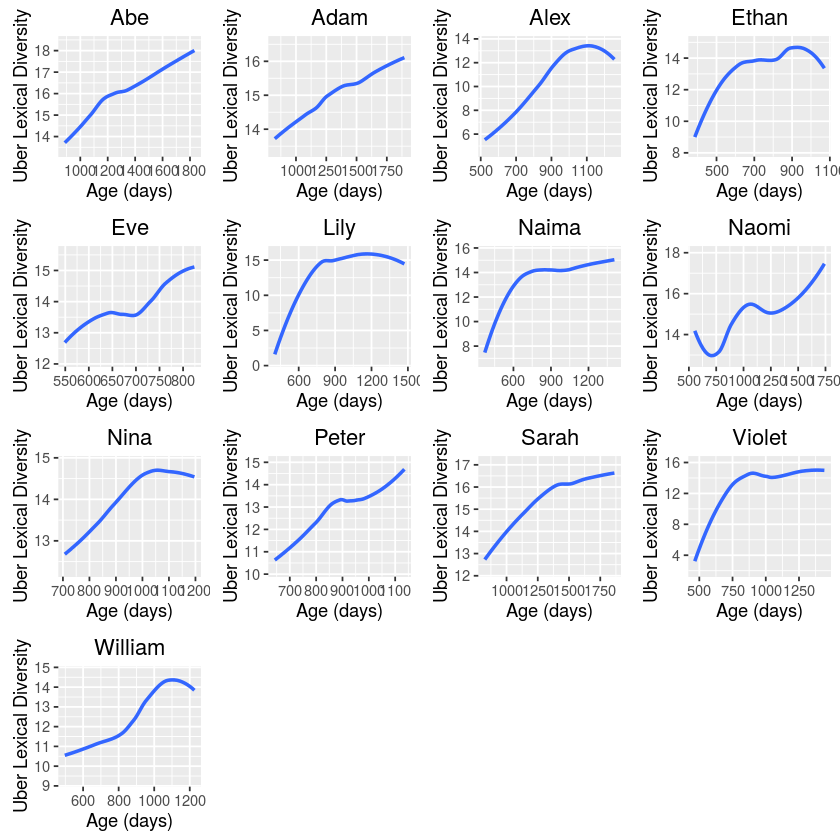

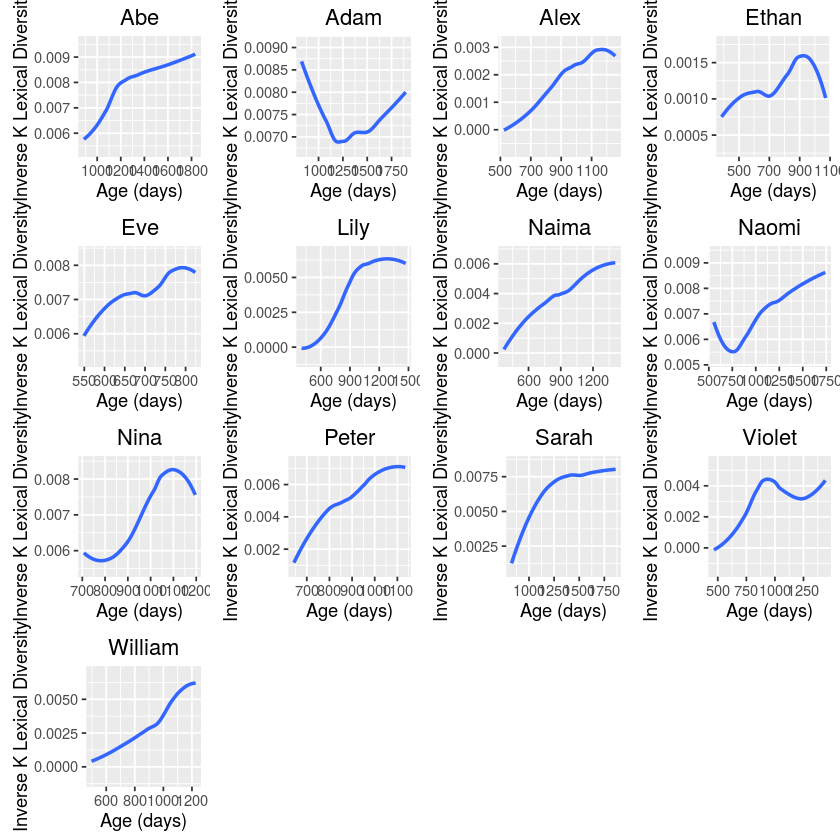

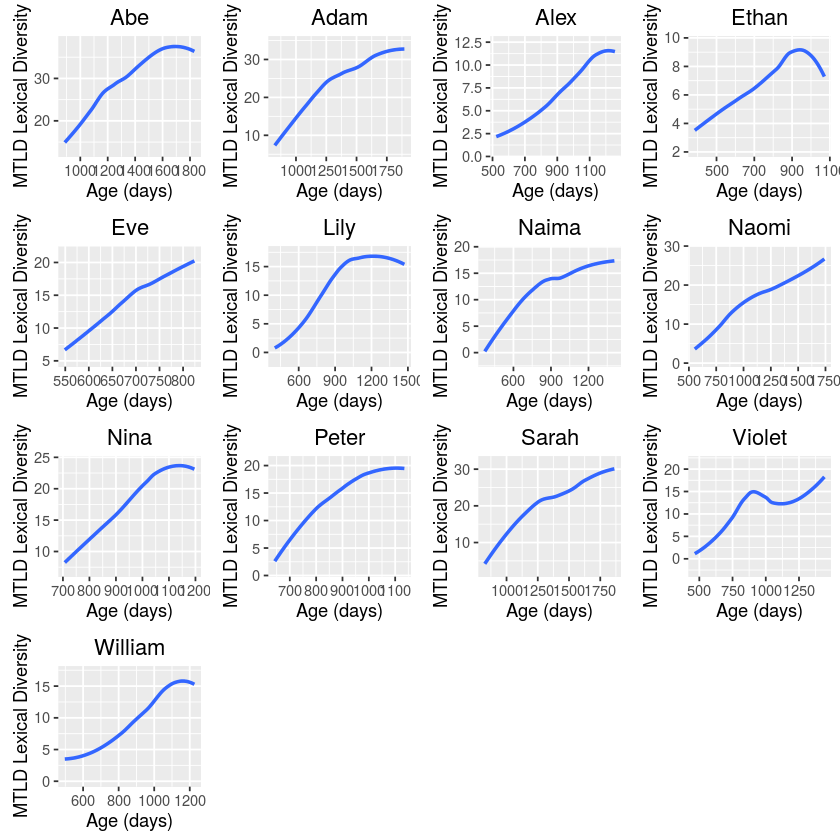

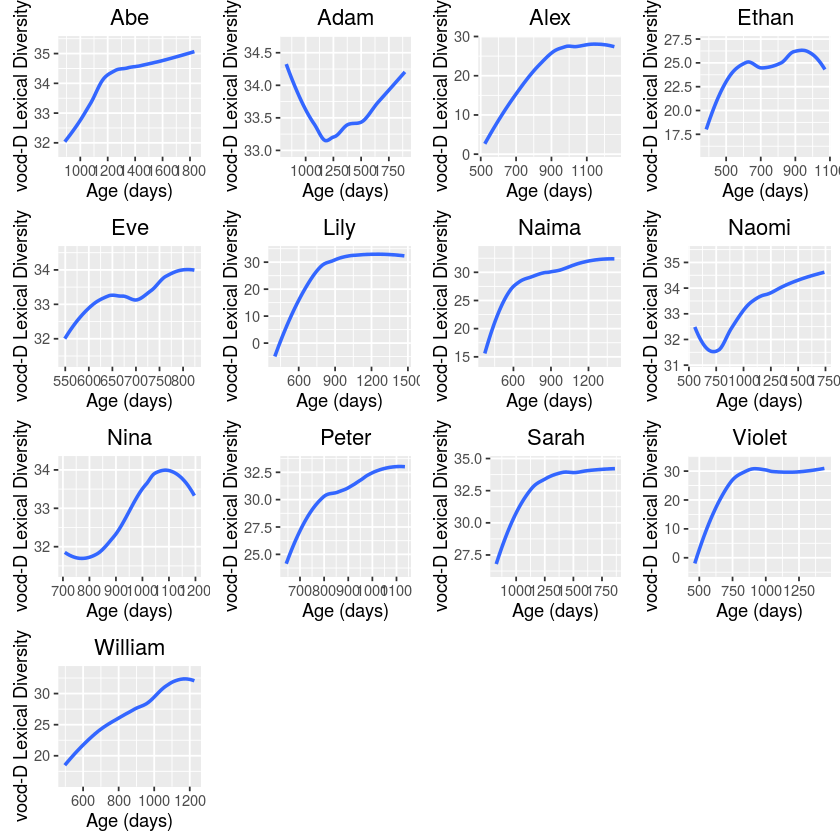

In [61]:
#plot all graphs of the same type together
#pdf(file = "UberLexDivDevChi.pdf", width = 28, height = 18)
Uplotall = do.call('grid.arrange', c(Uplotlist, list(ncol=4)))
#grid.arrange(Uplotall)
#dev.off()
#pdf(file = "YulesKLexDivDevChi.pdf", width = 28, height = 18)
Kplotall = do.call(grid.arrange, c(Kplotlist, list(ncol=4)))
#grid.arrange(Kplotall)
#dev.off()
#pdf(file = "MTLDLexDivDevChi.pdf", width = 28, height = 18)
MTLDplotall = do.call(grid.arrange, c(MTLDplotlist, list(ncol=4)))
#grid.arrange(MTLDplotall)
#dev.off()

VOCDplotall = do.call(grid.arrange, c(VOCDplotlist, list(ncol=4)))

In [73]:
namevec = c()
for(elem in 1:length(names(allchiLD))){
  namevec = c(namevec, rep(names(allchiLD)[elem], times = unname(sapply(allchiLD, dim)[1,])[elem]))  
}

In [74]:
all_chiLD_df = do.call("rbind", allchiLD)

In [75]:
all_chiLD_df$child = namevec
all_chiLD_df$gender = 0
all_chiLD_df$gender[all_chiLD_df$child %in% c("Nina", "Lily", "Naima", "Violet", "Eve", "Sarah", "Naomi")] = "female"
all_chiLD_df$gender[all_chiLD_df$child %in% c("Eric", "Peter", "Alex", "Ethan", "William", "Adam", "Abe")] = "male"

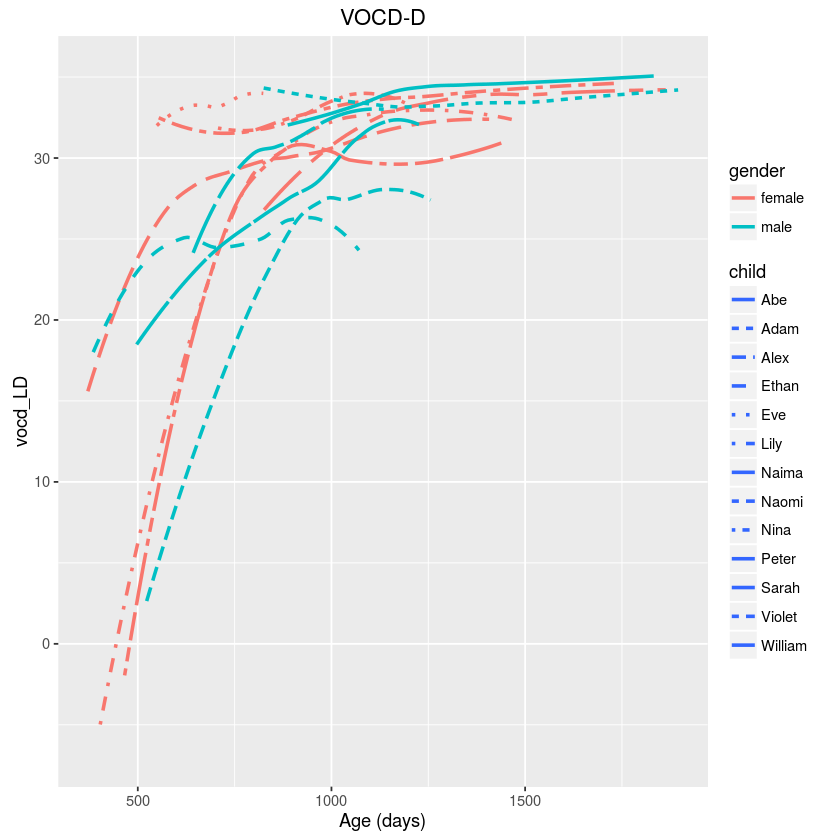

In [77]:
ggplot(data = all_chiLD_df, aes(x = med_age, y = vocd_LD, colour=gender, linetype=child)) + 
geom_smooth(fill = NA, size = 1) + labs(x = "Age (days)") + ggtitle('VOCD-D')

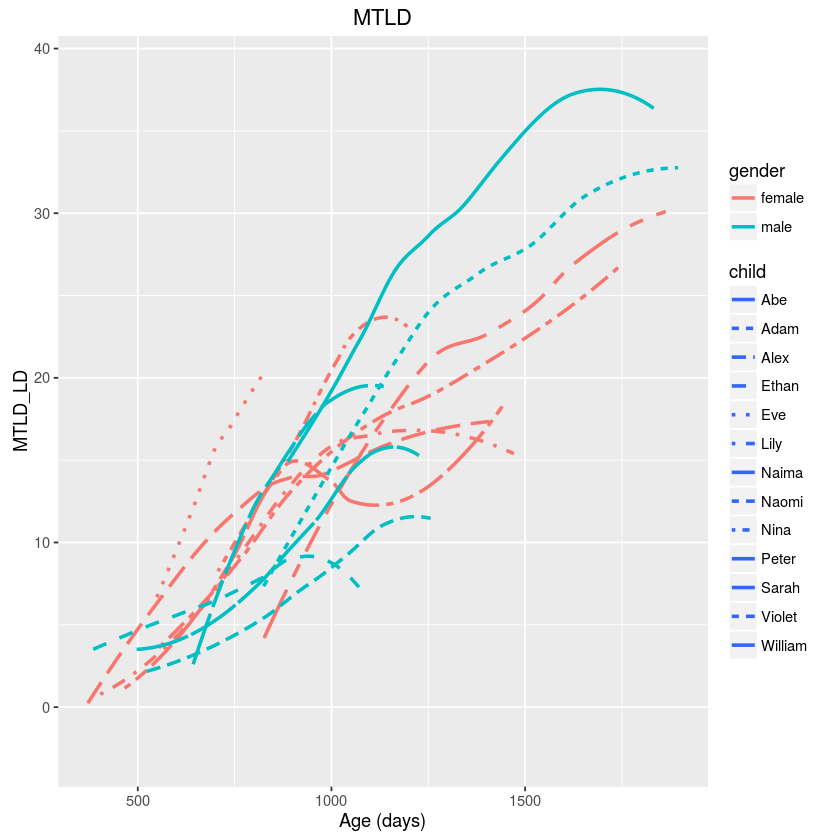

In [79]:
ggplot(data = all_chiLD_df, aes(x = med_age, y = MTLD_LD, colour=gender, linetype=child)) + 
geom_smooth(fill = NA, size = 1) + labs(x = "Age (days)") + ggtitle('MTLD')

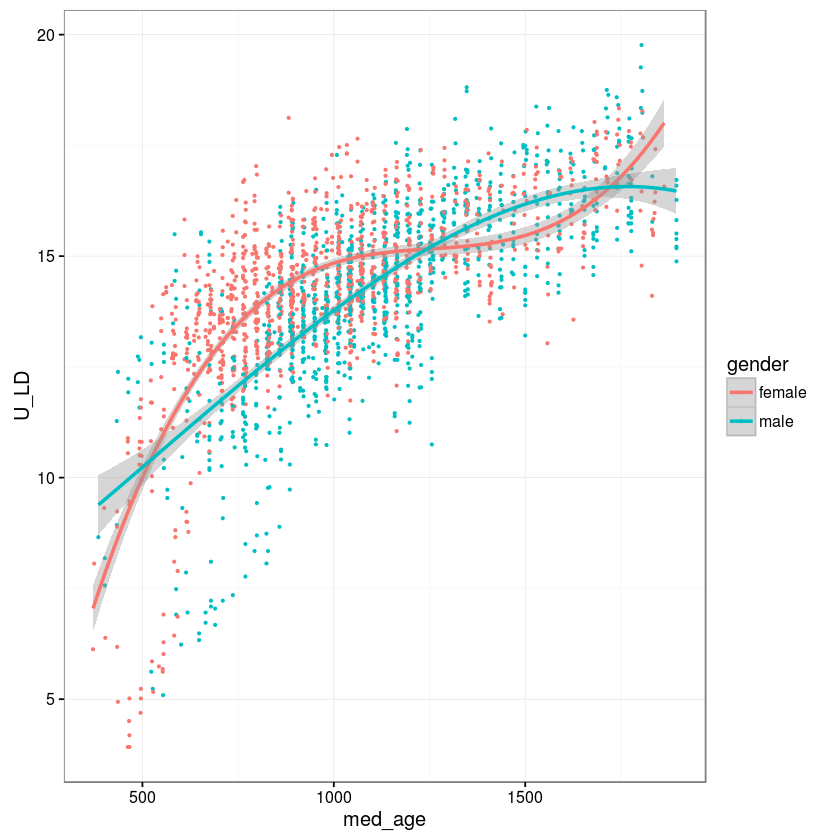

In [24]:
#plot generated in meeting on 3/9/16; shows Uber LD over time by gender
ggplot(all_chiLD_df, aes(x = med_age, y = U_LD)) + geom_point(aes(colour = gender), size=.5) + 
stat_smooth(aes(colour = gender), span = 0.1, formula = y ~ poly(x, 3), method = "gam") + theme_bw()

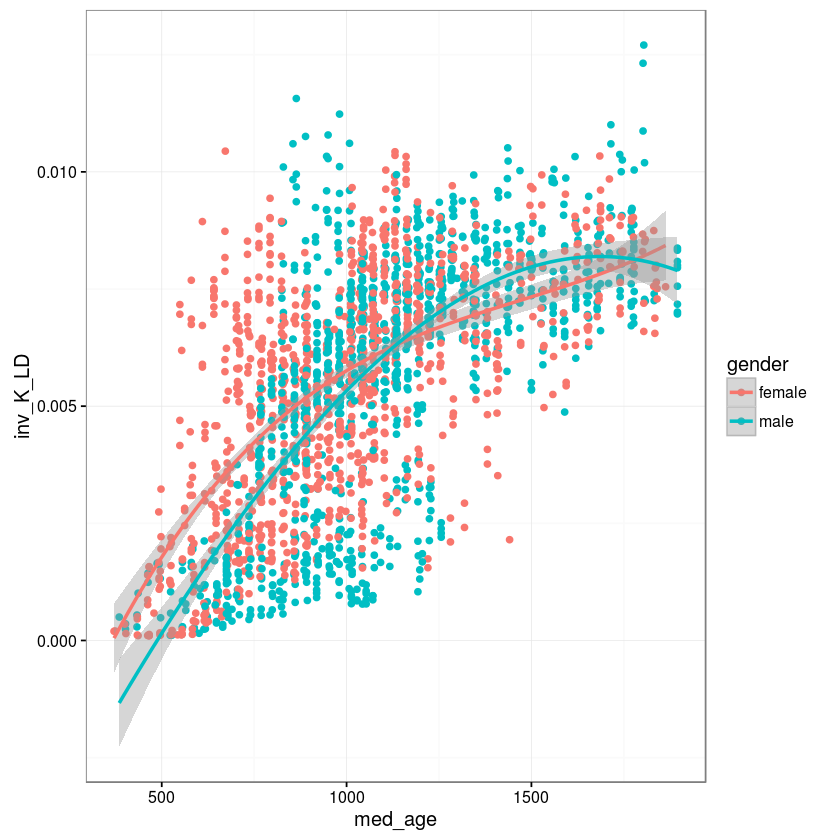

In [25]:
#plot generated in meeting on 3/9/16; shows Uber LD over time by gender
ggplot(all_chiLD_df, aes(x = med_age, y = inv_K_LD)) + geom_point(aes(colour = gender)) + 
stat_smooth(aes(colour = gender), span = 0.1, formula = y ~ poly(x, 3), method = "gam") + theme_bw()

In [27]:
all_chiLD_df$ageInMonths = all_chiLD_df$med_age / (30.5)

pdf 
  2

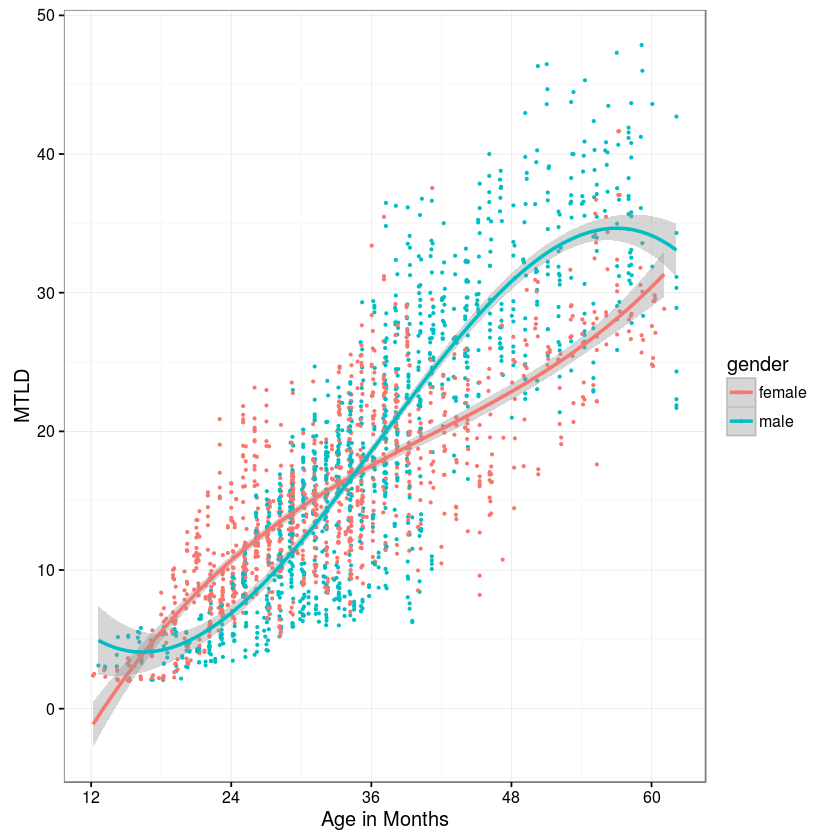

In [28]:
#plot generated in meeting on 3/9/16; shows Uber LD over time by gender
mtld_plot = ggplot(all_chiLD_df, aes(x = ageInMonths, y = MTLD_LD)) + geom_point(aes(colour = gender), size=.5) + 
stat_smooth(aes(colour = gender), span = 0.1, formula = y ~ poly(x, 3), method = "gam") + theme_bw(
) + scale_x_continuous(breaks=c(12,24,36,48,60)) + xlab('Age in Months') + ylab('MTLD')

pdf('mtld_plot.pdf')
print(mtld_plot)
dev.off()

mtld_plot

pdf 
  2

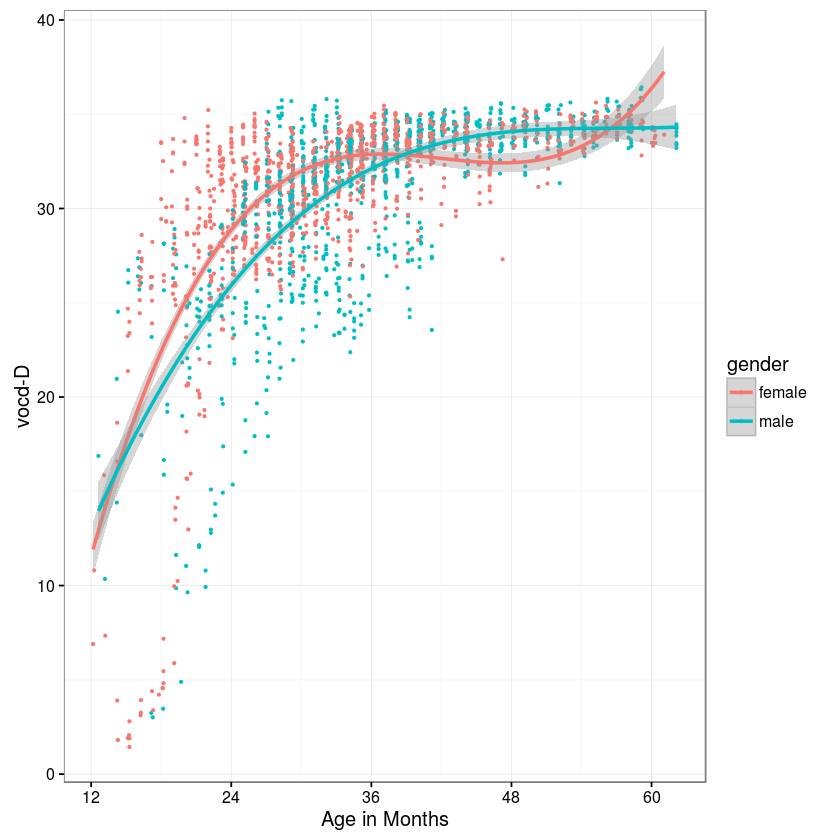

In [30]:
vocd_plot = ggplot(all_chiLD_df, aes(x = ageInMonths, y = vocd_LD)) + geom_point(aes(colour = gender), size=.5) + 
stat_smooth(aes(colour = gender), span = 0.1, formula = y ~ poly(x, 3), method = "gam") + theme_bw(
) + scale_x_continuous(breaks=c(12,24,36,48,60)) + xlab('Age in Months') + ylab('vocd-D')

pdf('vocd_plot.pdf')
print(vocd_plot)
dev.off()

vocd_plot

# Compute Parental lexical diversity of Uber Index, Yule's I, and MTLD by child

In [ ]:
Need more corpora with male children!! after 36 months suffers from having just 2 kids. After this add the 

In [82]:
childCounts= dbGetQuery(childes_db, 'select gloss, count(attags) from words where speaker = "CHI" group by gloss')

In [83]:
dim(childCounts)

[1] 12781     2

In [89]:
getPropertiesOfSubset = function(n){
    names(childCounts) = c('gloss', 'count')
    smallSet = subset(childCounts, count > n)
    print(paste('types:', nrow(smallSet)))
    print(paste('tokens', sum(smallSet$count)))
    }

In [90]:
getPropertiesOfSubset(0)

[1] "types: 12781"
[1] "tokens 1174567"


In [94]:
getPropertiesOfSubset(50)

[1] "types: 1507"
[1] "tokens 1099845"


In [95]:
subset(childCounts, count > 20)$gloss

[1] "&=laughs"          "&ah"               "&aw"              
   [4] "&di"               "&dih"              "&eh"              
   [7] "&ha"               "&hmm"              "&hoo"             
  [10] "&m"                "&mm"               "&muah"            
  [13] "&n"                "&p"                "&s"               
  [16] "&ss"               "&t"                "&uh"              
  [19] "&um"               "0"                 "0a"               
  [22] "0am"               "0an"               "0and"             
  [25] "0are"              "0at"               "0can"             
  [28] "0did"              "0do"               "0does"            
  [31] "0going"            "0have"             "0he"              
  [34] "0i"                "0in"               "0is"              
  [37] "0it"               "0of"               "0on"              
  [40] "0that"             "0the"              "0to"              
  [43] "0want"             "0what"             "0will"            
  [46] "0with"             "0you"              "a"                
  [49] "abcs"              "Abe"               "about"            
  [52] "accident"          "ache"              "achoo"            
  [55] "across"            "actually"          "Adam"             
  [58] "afraid"            "after"             "again"            
  [61] "ago"               "Agra"              "ah"               
  [64] "ain't"             "air"               "airplane"         
  [67] "airplanes"         "airport"           "ale"              
  [70] "Alec"              "Alex"              "alive"            
  [73] "all"               "alligator"         "alligators"       
  [76] "all_gone"          "almost"            "alone"            
  [79] "along"             "alphabet"          "already"          
  [82] "alright"           "also"              "always"           
  [85] "am"                "Amanda"            "ambulance"        
  [88] "an"                "and"               "Andy"             
  [91] "angry"             "animal"            "animals"          
  [94] "Ann"               "Ann_Marie"         "another"          
  [97] "ant"               "ants"              "any"              
 [100] "anybody"           "anymore"           "anyone"           
 [103] "anything"          "anyway"            "anywhere"         
 [106] "apart"             "apple"             "apples"           
 [109] "are"               "aren't"            "Ariel"            
 [112] "arm"               "armadillo"         "arms"             
 [115] "army"              "around"            "arrow"            
 [118] "Arthur"            "Arthur's"          "as"               
 [121] "Asha"              "ask"               "asked"            
 [124] "asleep"            "at"                "ate"              
 [127] "aunt"              "auntie"            "avocado"          
 [130] "awake"             "away"              "awful"            
 [133] "awhile"            "awoh"              "ax"               
 [136] "a_lot_of"          "b"                 "ba"               
 [139] "baa"               "Babaji"            "babies"           
 [142] "baby"              "baby's"            "back"             
 [145] "back+pack"         "backpack"          "backwards"        
 [148] "bacon"             "bad"               "bag"              
 [151] "bagel"             "bah"               "baking"           
 [154] "balance"           "ball"              "balloon"          
 [157] "balloons"          "balls"             "baloney"          
 [160] "bam"               "Bambi"             "Bam_Bam"          
 [163] "banana"            "bananas"           "band"             
 [166] "bandaid"           "band_aid"          "bang"             
 [169] "banjo"             "barking"           "barn"             
 [172] "Barney"            "barrel"            "barrels"          
 [175] "barrette"          "bars"              "baseball"         
 [178] "basket"            "basketball"        "ba

[ ] get a mapping from compounds / multiple forms / lemmatize (?). Ask Mika what their procedure is.<br />
[ ] remove types appearing with < m (2-10) kids<br />
[ ] remove types with token counts < n (2-50)<br />
--> want ~1000 lexical predictors